<h1>
<center>CFRM 421/521, Spring 2023</center>
</h1>

<h1>
<center>Yoshihiro Shirai</center>
</h1>

<h1>
<center>Homework 3</center>
</h1>

* **Due: Monday, May 13, 2024, 11:59 PM**


* Total marks: 38


* Late submissions are allowed, but a 20% penalty per day applies. Your last submission is considered for calculating the penalty.


*  Use this Jupyter notebook as a template for your solutions. **Your solution must be submitted as both one Jupyter notebook and one PDF file on Gradescope.** There will be two modules on Gradescope, one for each file type. The notebook must be already run, that is, make sure that you have run all the code, save the notebook, and then when you reopen the notebook, checked that all output appears as expected. You are allowed to use code from the textbook, textbook website, or lecture notes.

# 1. Applying PCA [6 marks]

## (a) [4 marks]
Train a SVM classifier with a Gaussian RBF kernel on the MNIST training data (the first 60,000 observations). Use the default arguments for the classifier. Take the first 10,000 observations as the training set given by `X_train_red` and `y_train_red` in the code below. Time your training using `%time` and report the accuracy of the trained model on the test set (the last 10,000 observations of MNIST). Now, use PCA on the original training set (60,0000 observations) to find principal components with an explained variance ratio of 60%. Retrain the SVM classifier using these principal components instead of the original features. Time the training and accuracy on the test set. Comment on whether PCA helped or not. Do not shuffle the data and do not use a standard scaler.

In [1]:
import numpy as np

from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, as_frame=False, cache=True)
mnist.target = mnist.target.astype(np.int8)
X_train = mnist["data"][:60000]
X_test  = mnist["data"][60000:]
y_train = mnist["target"][:60000]
y_test  = mnist["target"][60000:]
X_train_red = mnist["data"][:10000]
y_train_red = mnist["target"][:10000]

**Solution**

Create a training set with 10,000 observations, fit a SVC and get the accuracy on the test set.

In [2]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
from sklearn.svm import SVC

svmrbf = SVC()
%time svmrbf.fit(X_train_red, y_train_red)

CPU times: total: 7.8 s
Wall time: 9.41 s


SVC()

In [4]:
svmrbf.score(X_test, y_test)

0.9594

Next, we use PCA to reduce the dimensionality of the features. As the following code indicates, the first 17 components have 60% explained variance ratio (the first 154 principal components have a 95% explained variance ratio).

In [5]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.6)
X_train_pca = pca.fit_transform(X_train)
print(X_train_pca.shape)
print(sum(pca.explained_variance_ratio_))

(60000, 17)
0.6074124552802452


Now train the SVC using the PCA instead of the lower sample size training set.

In [6]:
svmrbf_pca = SVC(random_state=42)
%time svmrbf_pca.fit(X_train_pca, y_train)

CPU times: total: 7.62 s
Wall time: 8.28 s


SVC(random_state=42)

Now we get the accuracy on the test set. Note that the test set also needs to be transformed by PCA.

In [7]:
X_test_pca = pca.transform(X_test)
svmrbf_pca.score(X_test_pca, y_test)

0.9723

Using PCA, the training time is longer than using the lower sample size (though it's significantly faster than using the full training set), and we can fit a SVC to the entire training data in reasonable time, and achieve better accuracy compared to the lower sample size (small sample size: 96%, PCA: 97%). PCA seems to have helped.

## (b) [2 marks]

Repeat (a) using a random forest classifier instead of the SVM classifier and comment on the result. Use `random_state=42` in the classifier and use the default for the other arguments. You are allowed to use `n_jobs=-1`.

**Solution**

The following code trains a random forest classifier on the lower sample size training set.

In [8]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_jobs=-1, random_state=42)
%time forest.fit(X_train_red, y_train_red)

CPU times: total: 6.58 s
Wall time: 666 ms


RandomForestClassifier(n_jobs=-1, random_state=42)

In [9]:
forest.score(X_test, y_test)

0.9504

Next, let us train a random forest using the principal components on the full training set from the previous part.

In [10]:
forest_pca = RandomForestClassifier(n_jobs=-1, random_state=42)
%time forest_pca.fit(X_train_pca, y_train)

CPU times: total: 1min 8s
Wall time: 5.29 s


RandomForestClassifier(n_jobs=-1, random_state=42)

In [11]:
forest_pca.score(X_test_pca, y_test)

0.943

The accuracy on the test set is worse when using PCA as compared to training the model on the lower sample size training set (small sample size: 95%, PCA: 94%), and it's also slower. PCA did not help. So as (a) and (b) show, PCA can be very helpful or not depending on the data and training algorithm. Some training algorithms, such as decision trees (and, therefore, random forests) are very sensitive to transformations on the data. Applying dimension reduction may change their performance a lot (for better or worse).

# 2. Visualizing dimensionality reduction [8 marks]

## (a) [3 marks]
Load the MNIST dataset and take only the first 5,000 observations as `X` and `y`. Use the nonlinear dimensionality reduction technique **t-SNE** to reduce this subset of the MNIST dataset down to 2 dimensions. Include the argument `random_state=42`. Measure how long it took to reduce the dimensionality, this will be used in (b) below. Plot a scatterplot of the outcome of t-SNE. Use 10 different colors to represent each image's target class and plot scaled-down versions of the digit images themselves. The visualization will be too cluttered if you draw the image for every observation, so you should either draw a random sample or plot an instance only if no other instance has already been plotted at a close distance. You should get a nice visualization of different classes and some of the digit images in them. See the textbook's Jupyter notebook for the code. Use the plot to comment on which classes are easily identified and which ones can be hard to distinguish.

Hint: See the solution of Chapter 8, Question 10 in this [Jupyter notebook](https://github.com/ageron/handson-ml3/blob/main/08_dimensionality_reduction.ipynb) on the textbook website to see how to implement t-SNE and produce these plots using the `plot_digits()` function.

**Solution**

Get the data.

In [12]:
X = mnist["data"][:5000]
y = mnist["target"][:5000]

Next, we use the `sklearn.manifold.TSNE` class to reduce the dimensionality to 2.

In [13]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42)
%time X_reduced = tsne.fit_transform(X)

CPU times: total: 1min 9s
Wall time: 15.6 s


A scatter plot of the `X` reduces the data to 2 dimensions (this plot is NOT required by the question).

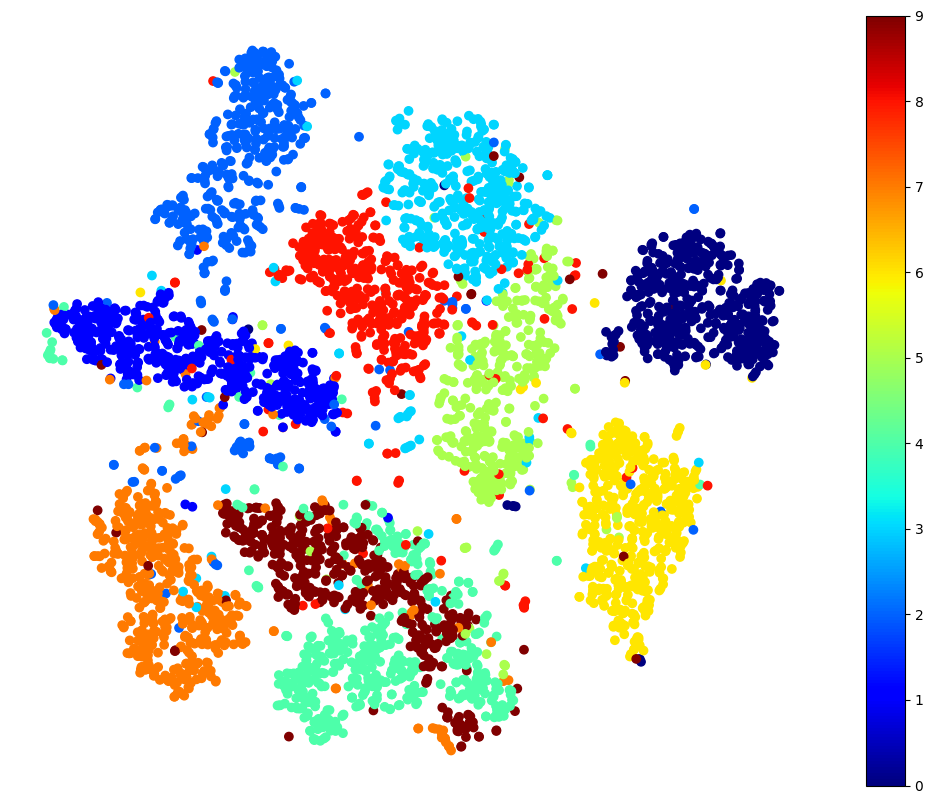

In [14]:
plt.figure(figsize=(13,10))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, cmap="jet")
plt.axis('off')
plt.colorbar()
plt.show()

Now using the helper function in the textbook website, we add scaled-down versions of the digit images themselves to the plot.

In [15]:
from sklearn.preprocessing import MinMaxScaler
from matplotlib.offsetbox import AnnotationBbox, OffsetImage

def plot_digits(X, y, min_distance=0.04, images=None, figsize=(13, 10)):
    # Let's scale the input features so that they range from 0 to 1
    X_normalized = MinMaxScaler().fit_transform(X)
    # Now we create the list of coordinates of the digits plotted so far.
    # We pretend that one is already plotted far away at the start, to
    # avoid `if` statements in the loop below
    neighbors = np.array([[10., 10.]])
    # The rest should be self-explanatory
    plt.figure(figsize=figsize)
    cmap = plt.cm.jet
    digits = np.unique(y)
    for digit in digits:
        plt.scatter(X_normalized[y == digit, 0], X_normalized[y == digit, 1],
                    c=[cmap(float(digit) / 9)], alpha=0.5)
    plt.axis("off")
    ax = plt.gca()  # get current axes
    for index, image_coord in enumerate(X_normalized):
        closest_distance = np.linalg.norm(neighbors - image_coord, axis=1).min()
        if closest_distance > min_distance:
            neighbors = np.r_[neighbors, [image_coord]]
            if images is None:
                plt.text(image_coord[0], image_coord[1], str(int(y[index])),
                         color=cmap(float(y[index]) / 9),
                         fontdict={"weight": "bold", "size": 16})
            else:
                image = images[index].reshape(28, 28)
                imagebox = AnnotationBbox(OffsetImage(image, cmap="binary"),
                                          image_coord)
                ax.add_artist(imagebox)

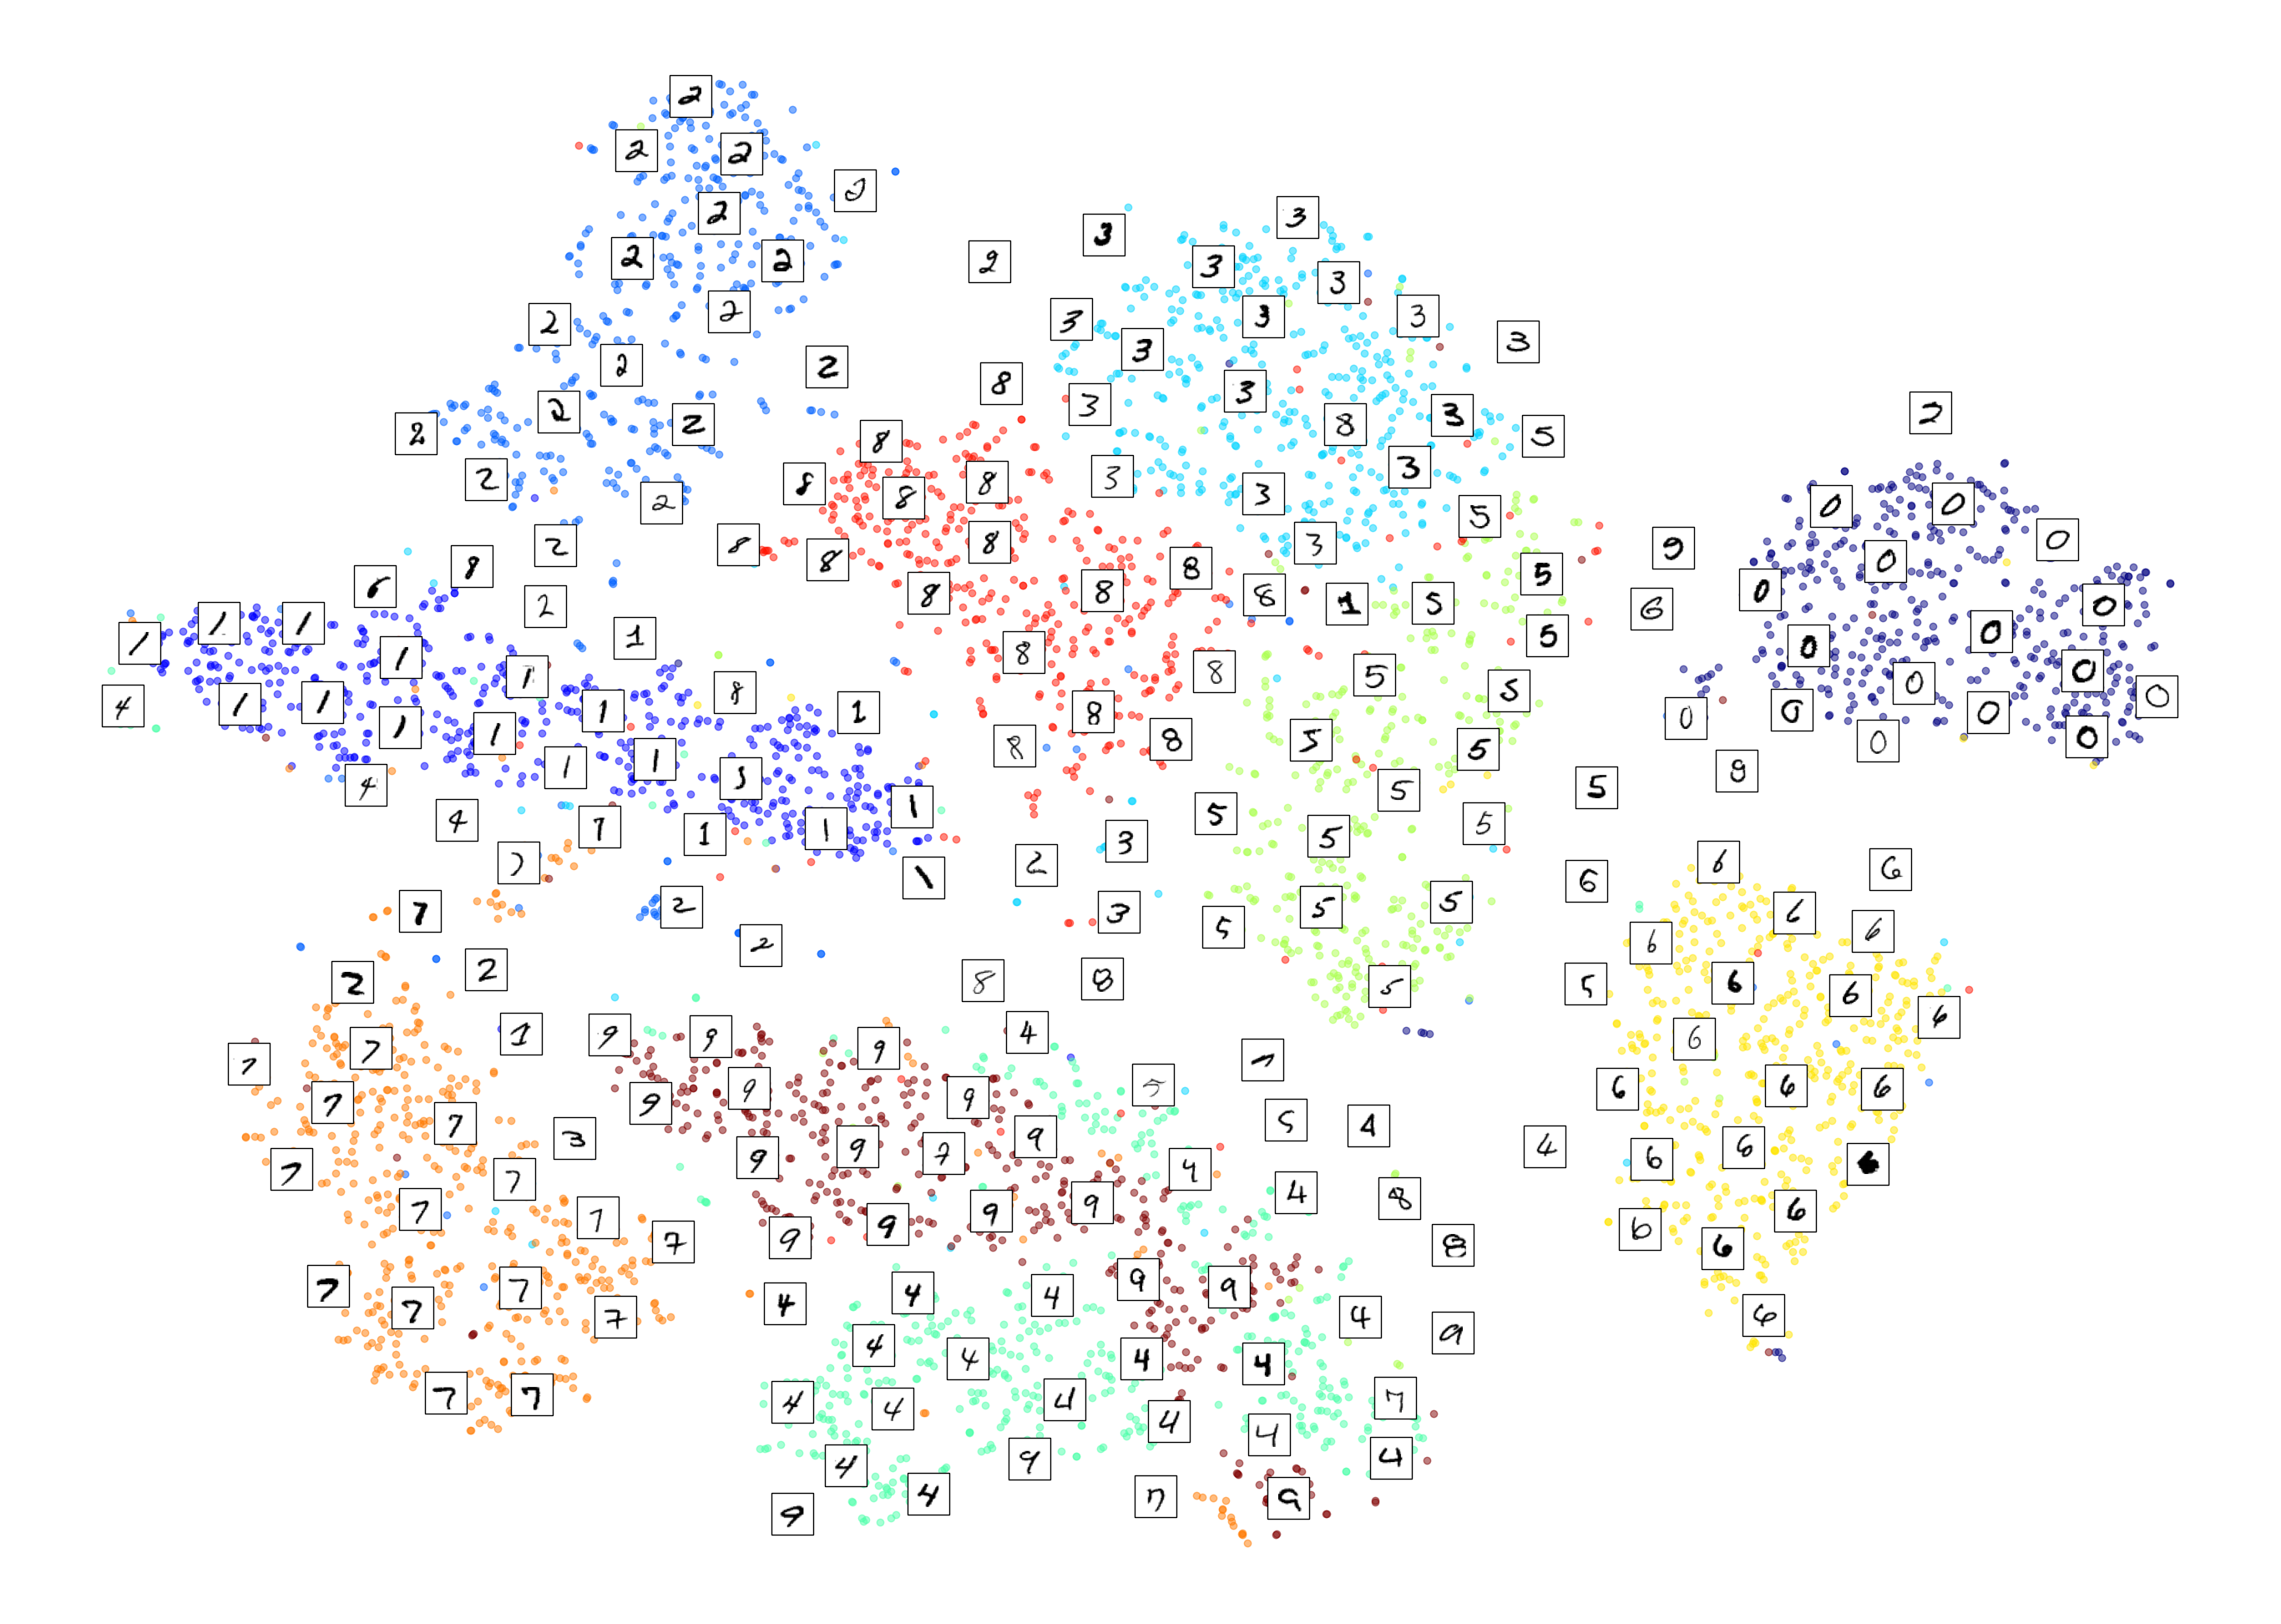

In [16]:
plot_digits(X_reduced, y, images=X, figsize=(35, 25))

Comment: Classes like "1" and "0", for example, are easily distinguished, they are at distant ends of the plot. "4" and "9" are harder to distinguish as they are intermingled in the plot, which is unsurprising. Some of the "3"s and "5"s are a bit hard to distinguish as they are close together.

## (b) [5 marks]
Try using other dimensionality reduction methods. Specifically, try:

* Regular PCA to reduce to 2 dimensions.
* LLE to reduce to 2 dimensions.
* First apply PCA with an explained variance ratio of 95%, then apply t-SNE to reduce to 2 dimensions.

For each algorithm, include the argument `random_state=42`. Then for each of the three methods above, report how long it took to reduce the dimension. Also, provide a 2D plot of the results. Which method runs faster? Which one results in a better visualization? Include t-SNE from (a) as part of your comparison.

**Solution**

PCA takes less than a second. However, the visualization is not good.

In [17]:
pca = PCA(n_components=2, random_state=42)
%time X_pca_reduced = pca.fit_transform(X)

CPU times: total: 78.1 ms
Wall time: 101 ms


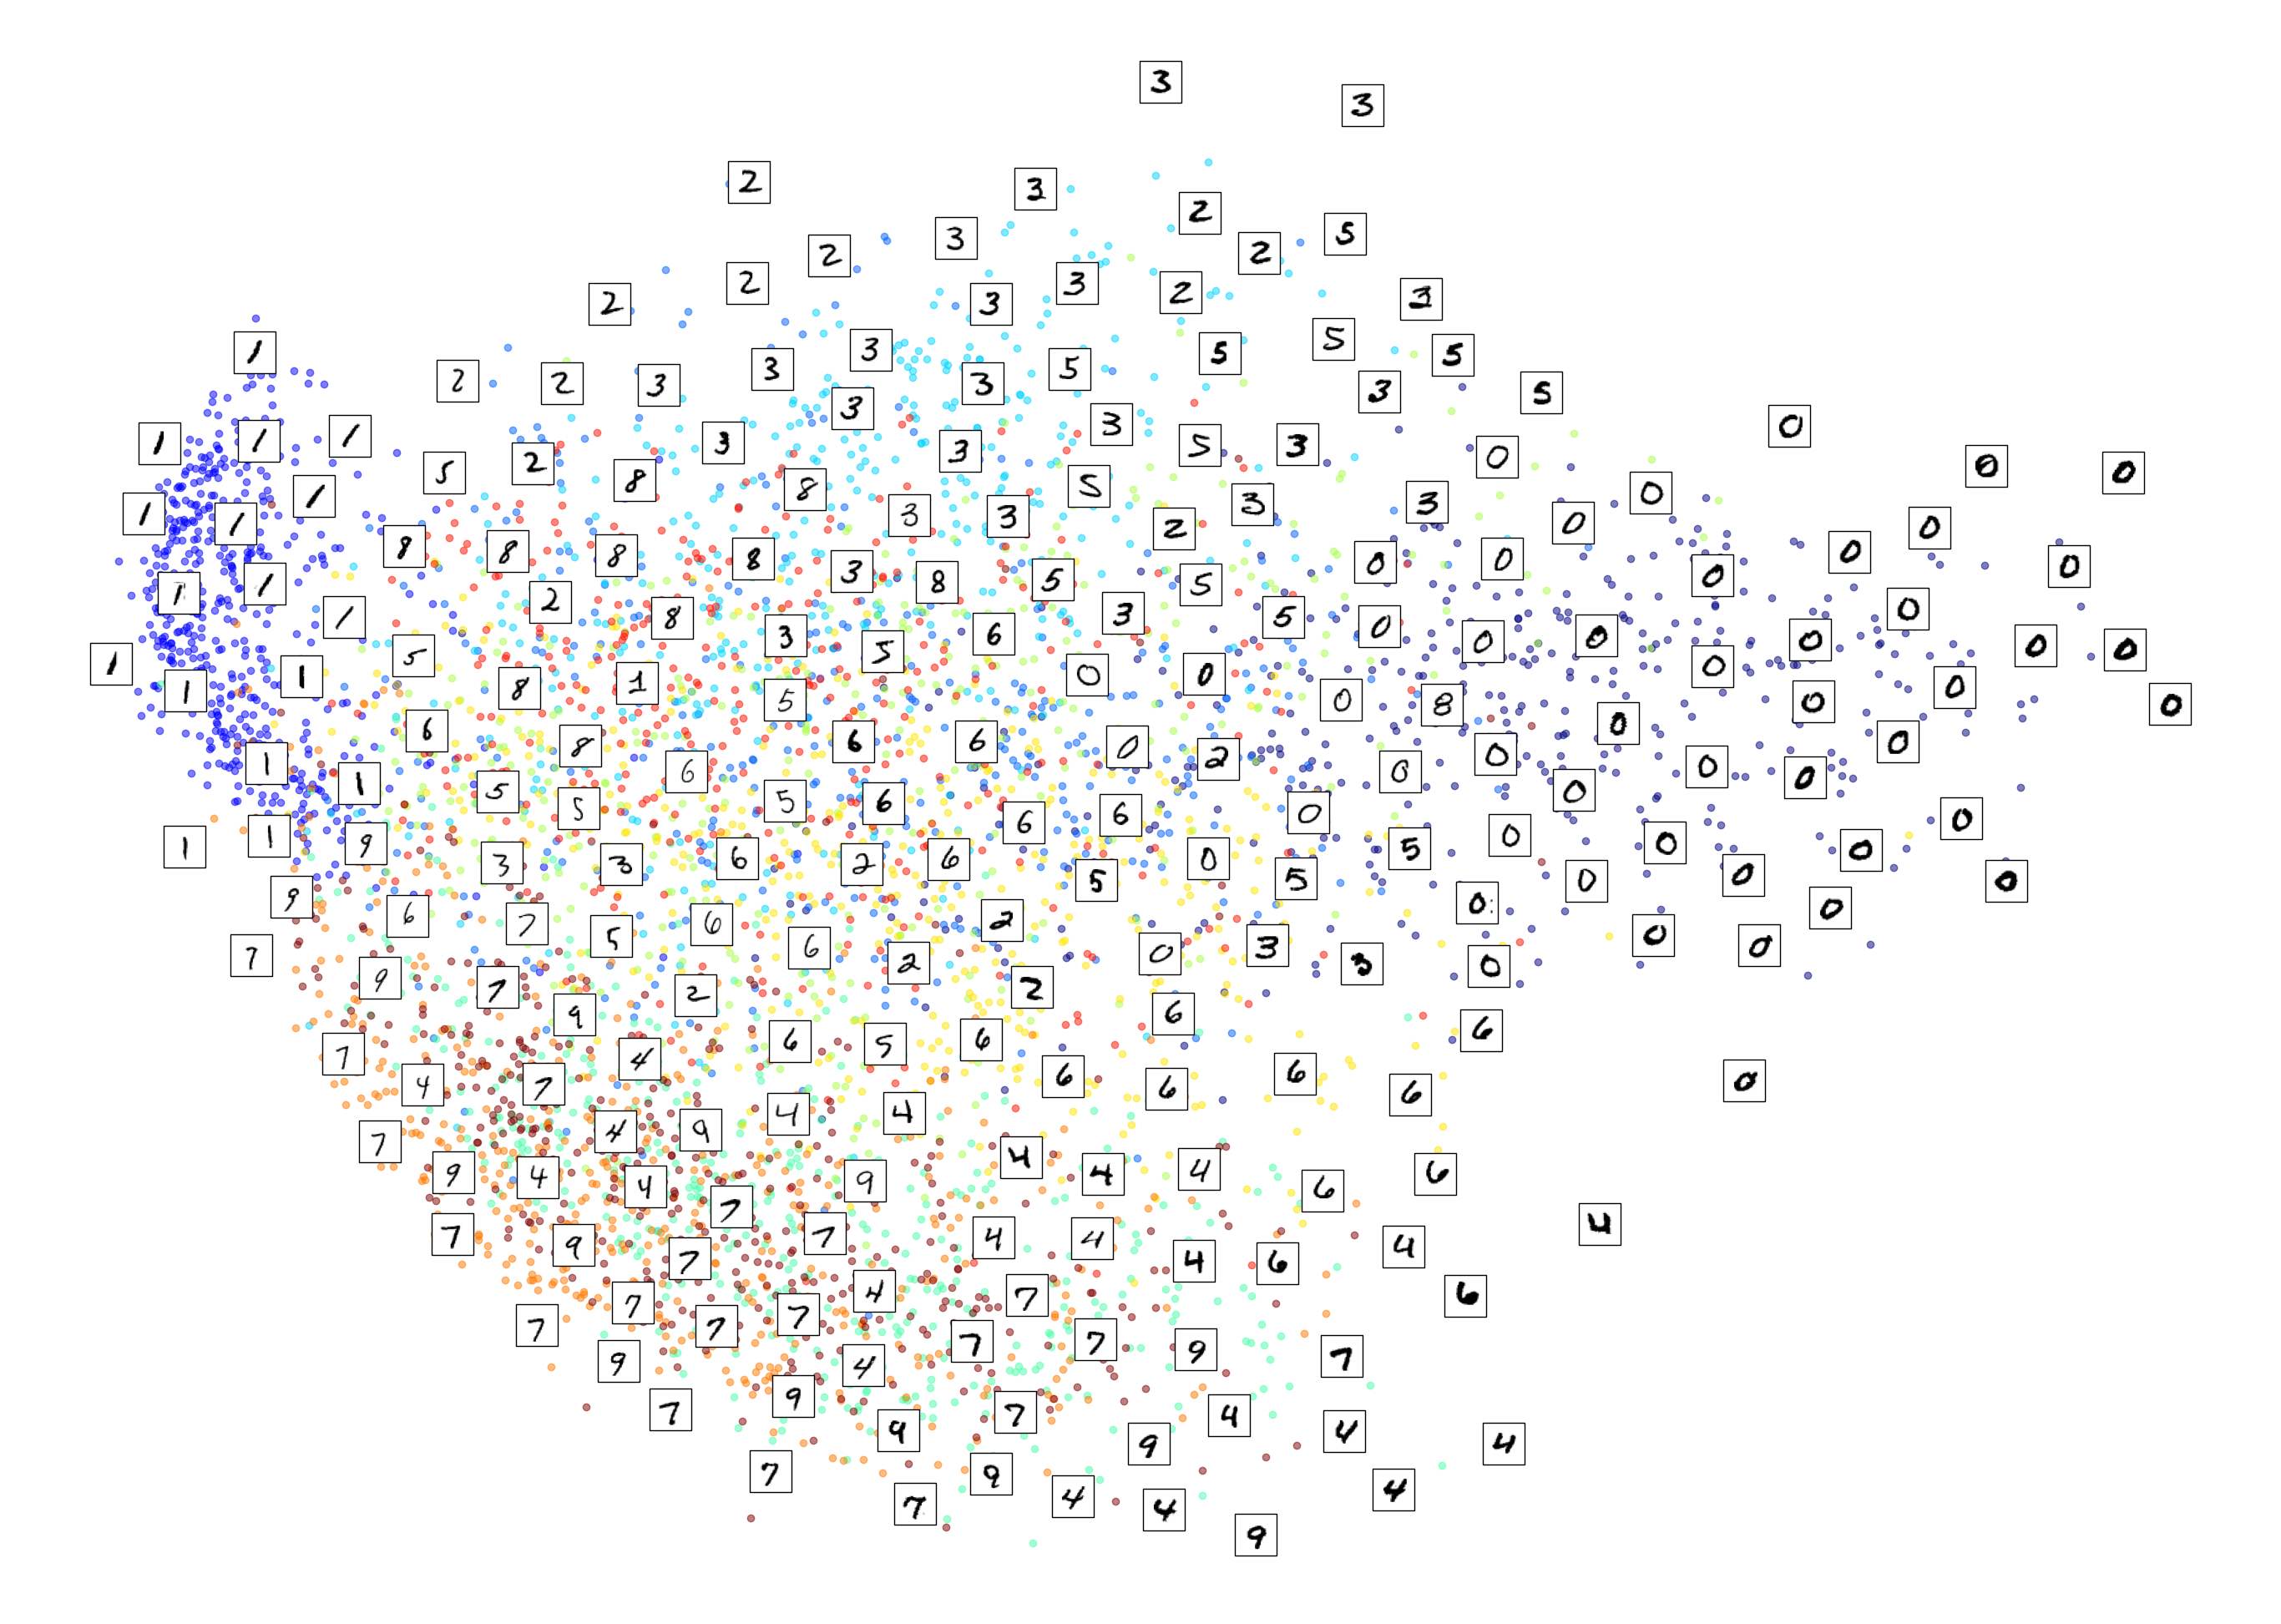

In [18]:
plot_digits(X_pca_reduced, y, images=X, figsize=(35, 25))

LLE takes ~1-2s, and creates a worst visualization than t-SNE.

In [19]:
from sklearn.manifold import LocallyLinearEmbedding

lle = LocallyLinearEmbedding(n_components=2, random_state=42)
%time X_lle_reduced = lle.fit_transform(X)

CPU times: total: 6.52 s
Wall time: 8.29 s


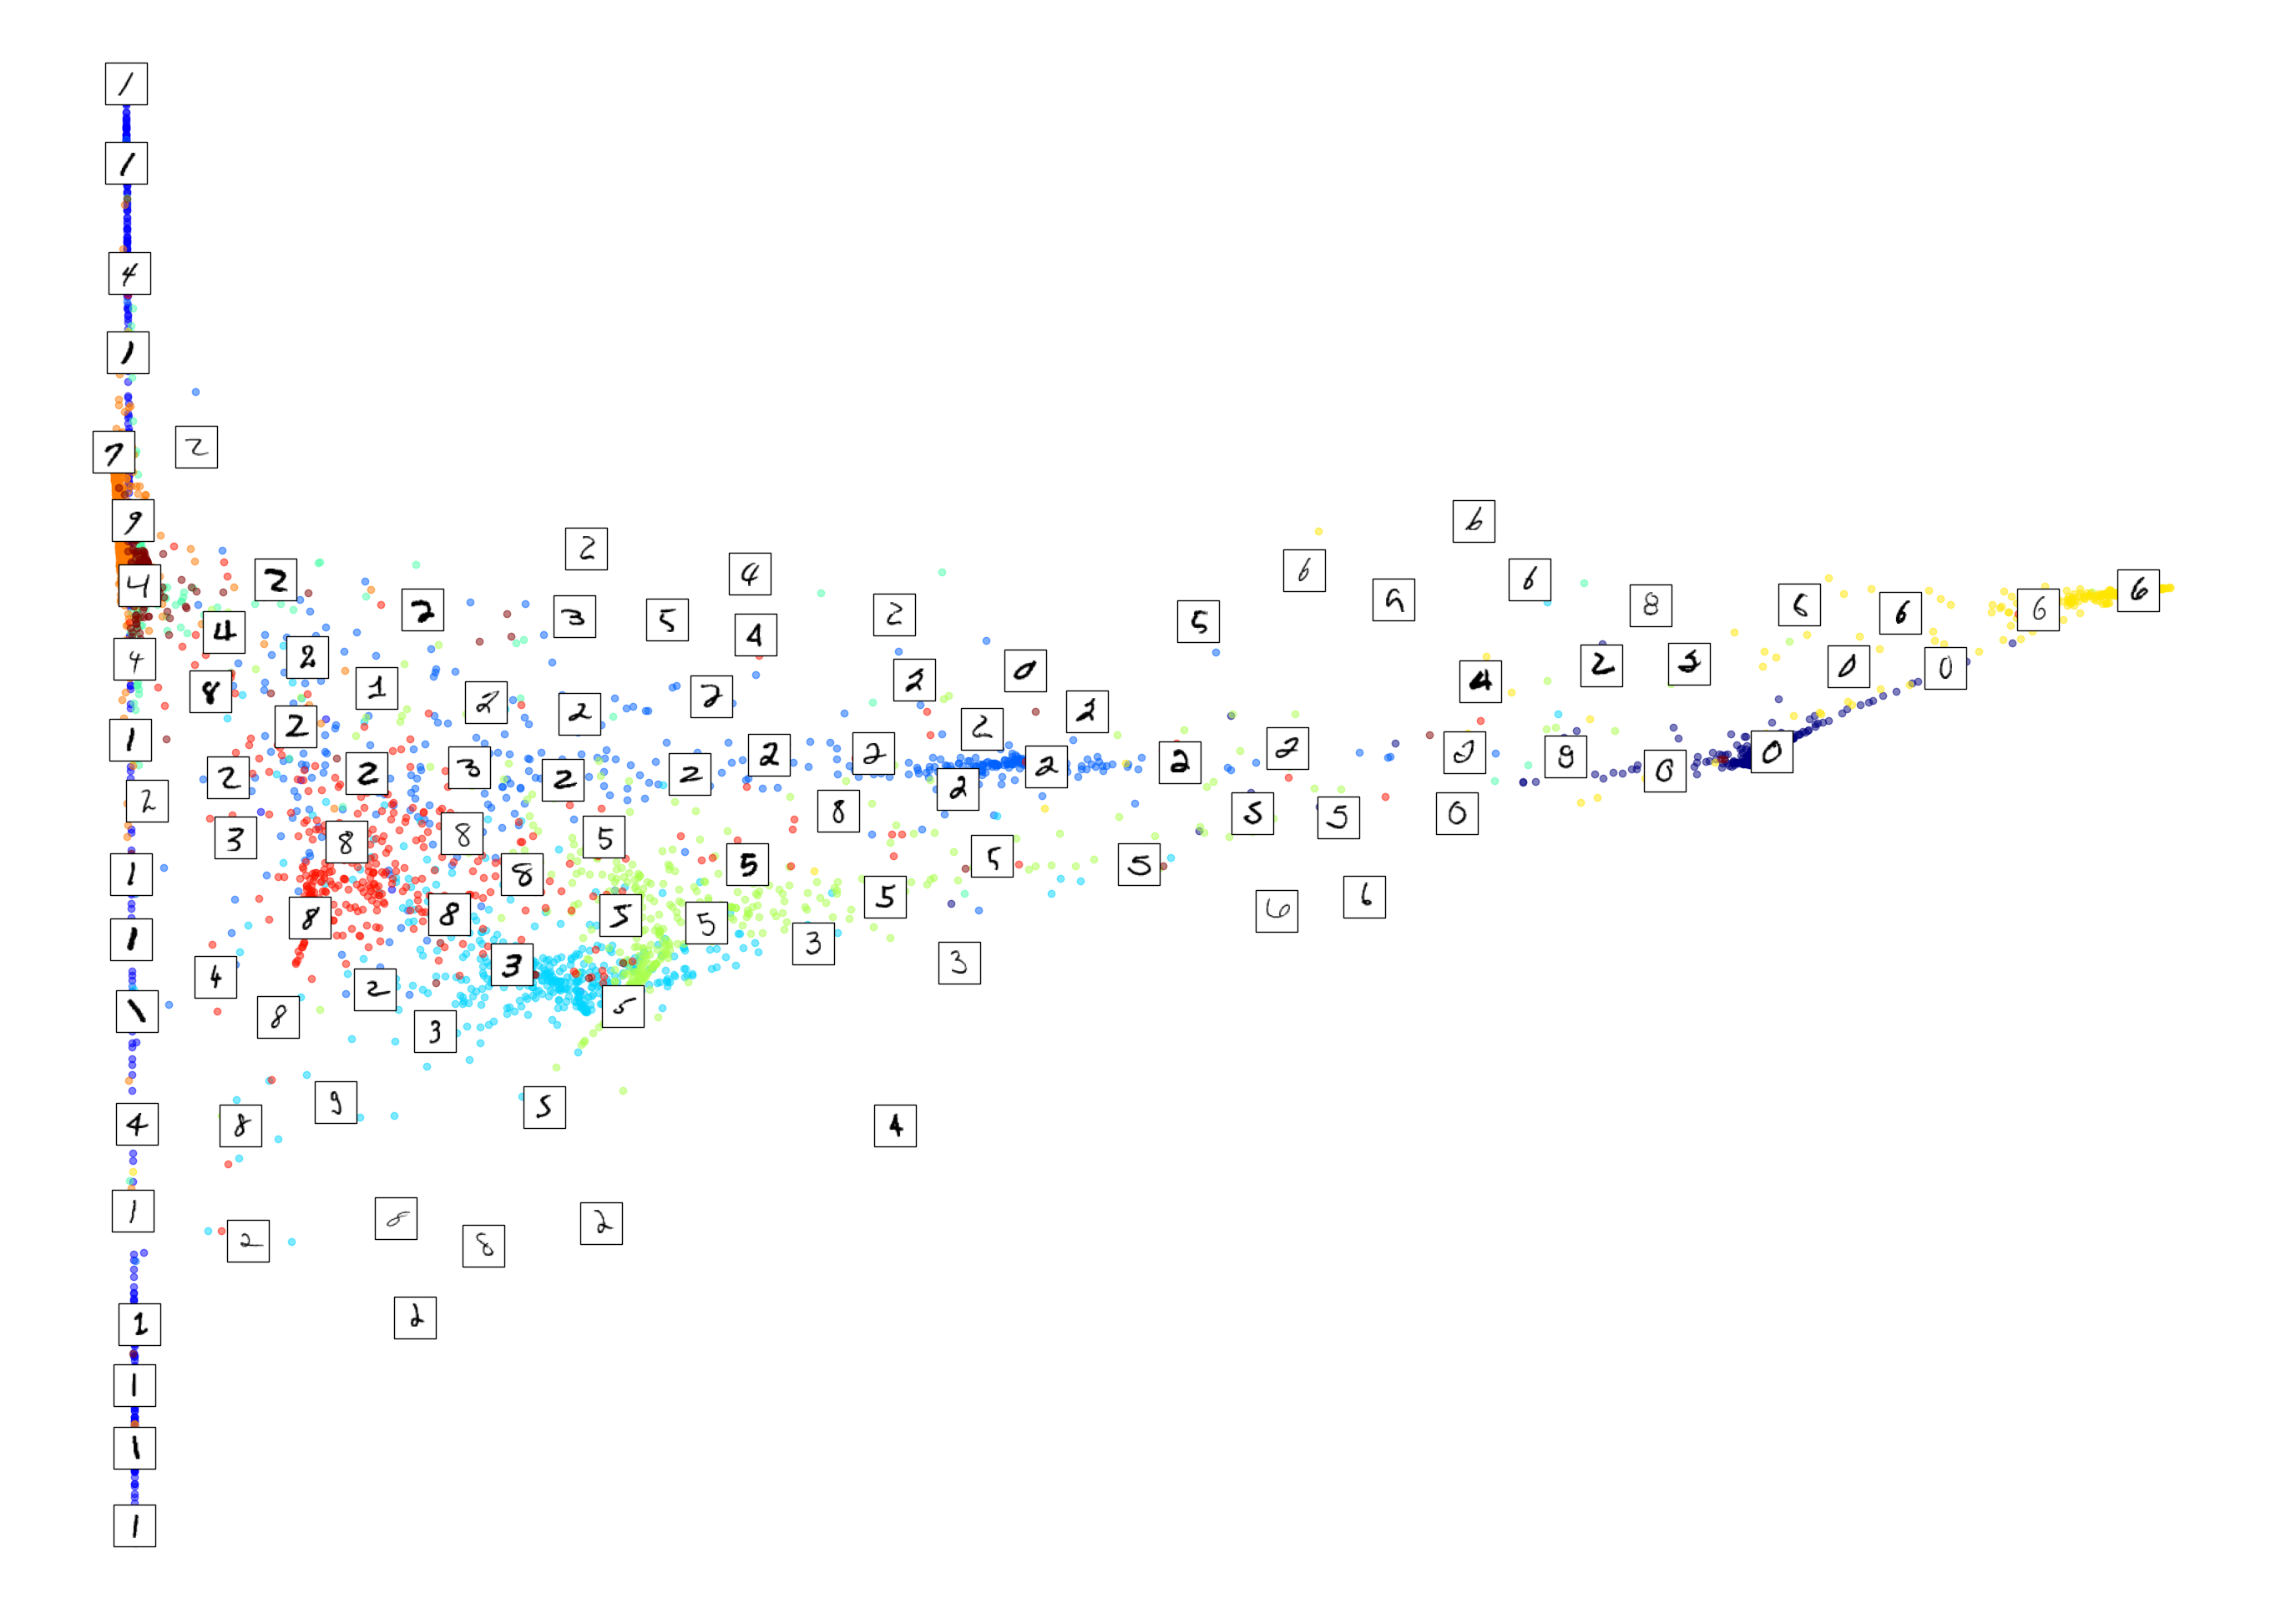

In [20]:
plot_digits(X_lle_reduced, y, images=X, figsize=(35, 25))

Applying PCA then t-SNE takes ~12s (around the same time as t-SNE without PCA), the visualization is good and similar to t-SNE.

In [21]:
from sklearn.pipeline import Pipeline

pca_tsne = Pipeline([
    ("pca", PCA(n_components=0.95, random_state=42)),
    ("tsne", TSNE(n_components=2, random_state=42)),
])

%time X_pcatsne_reduced = pca_tsne.fit_transform(X)

CPU times: total: 38.1 s
Wall time: 15.5 s


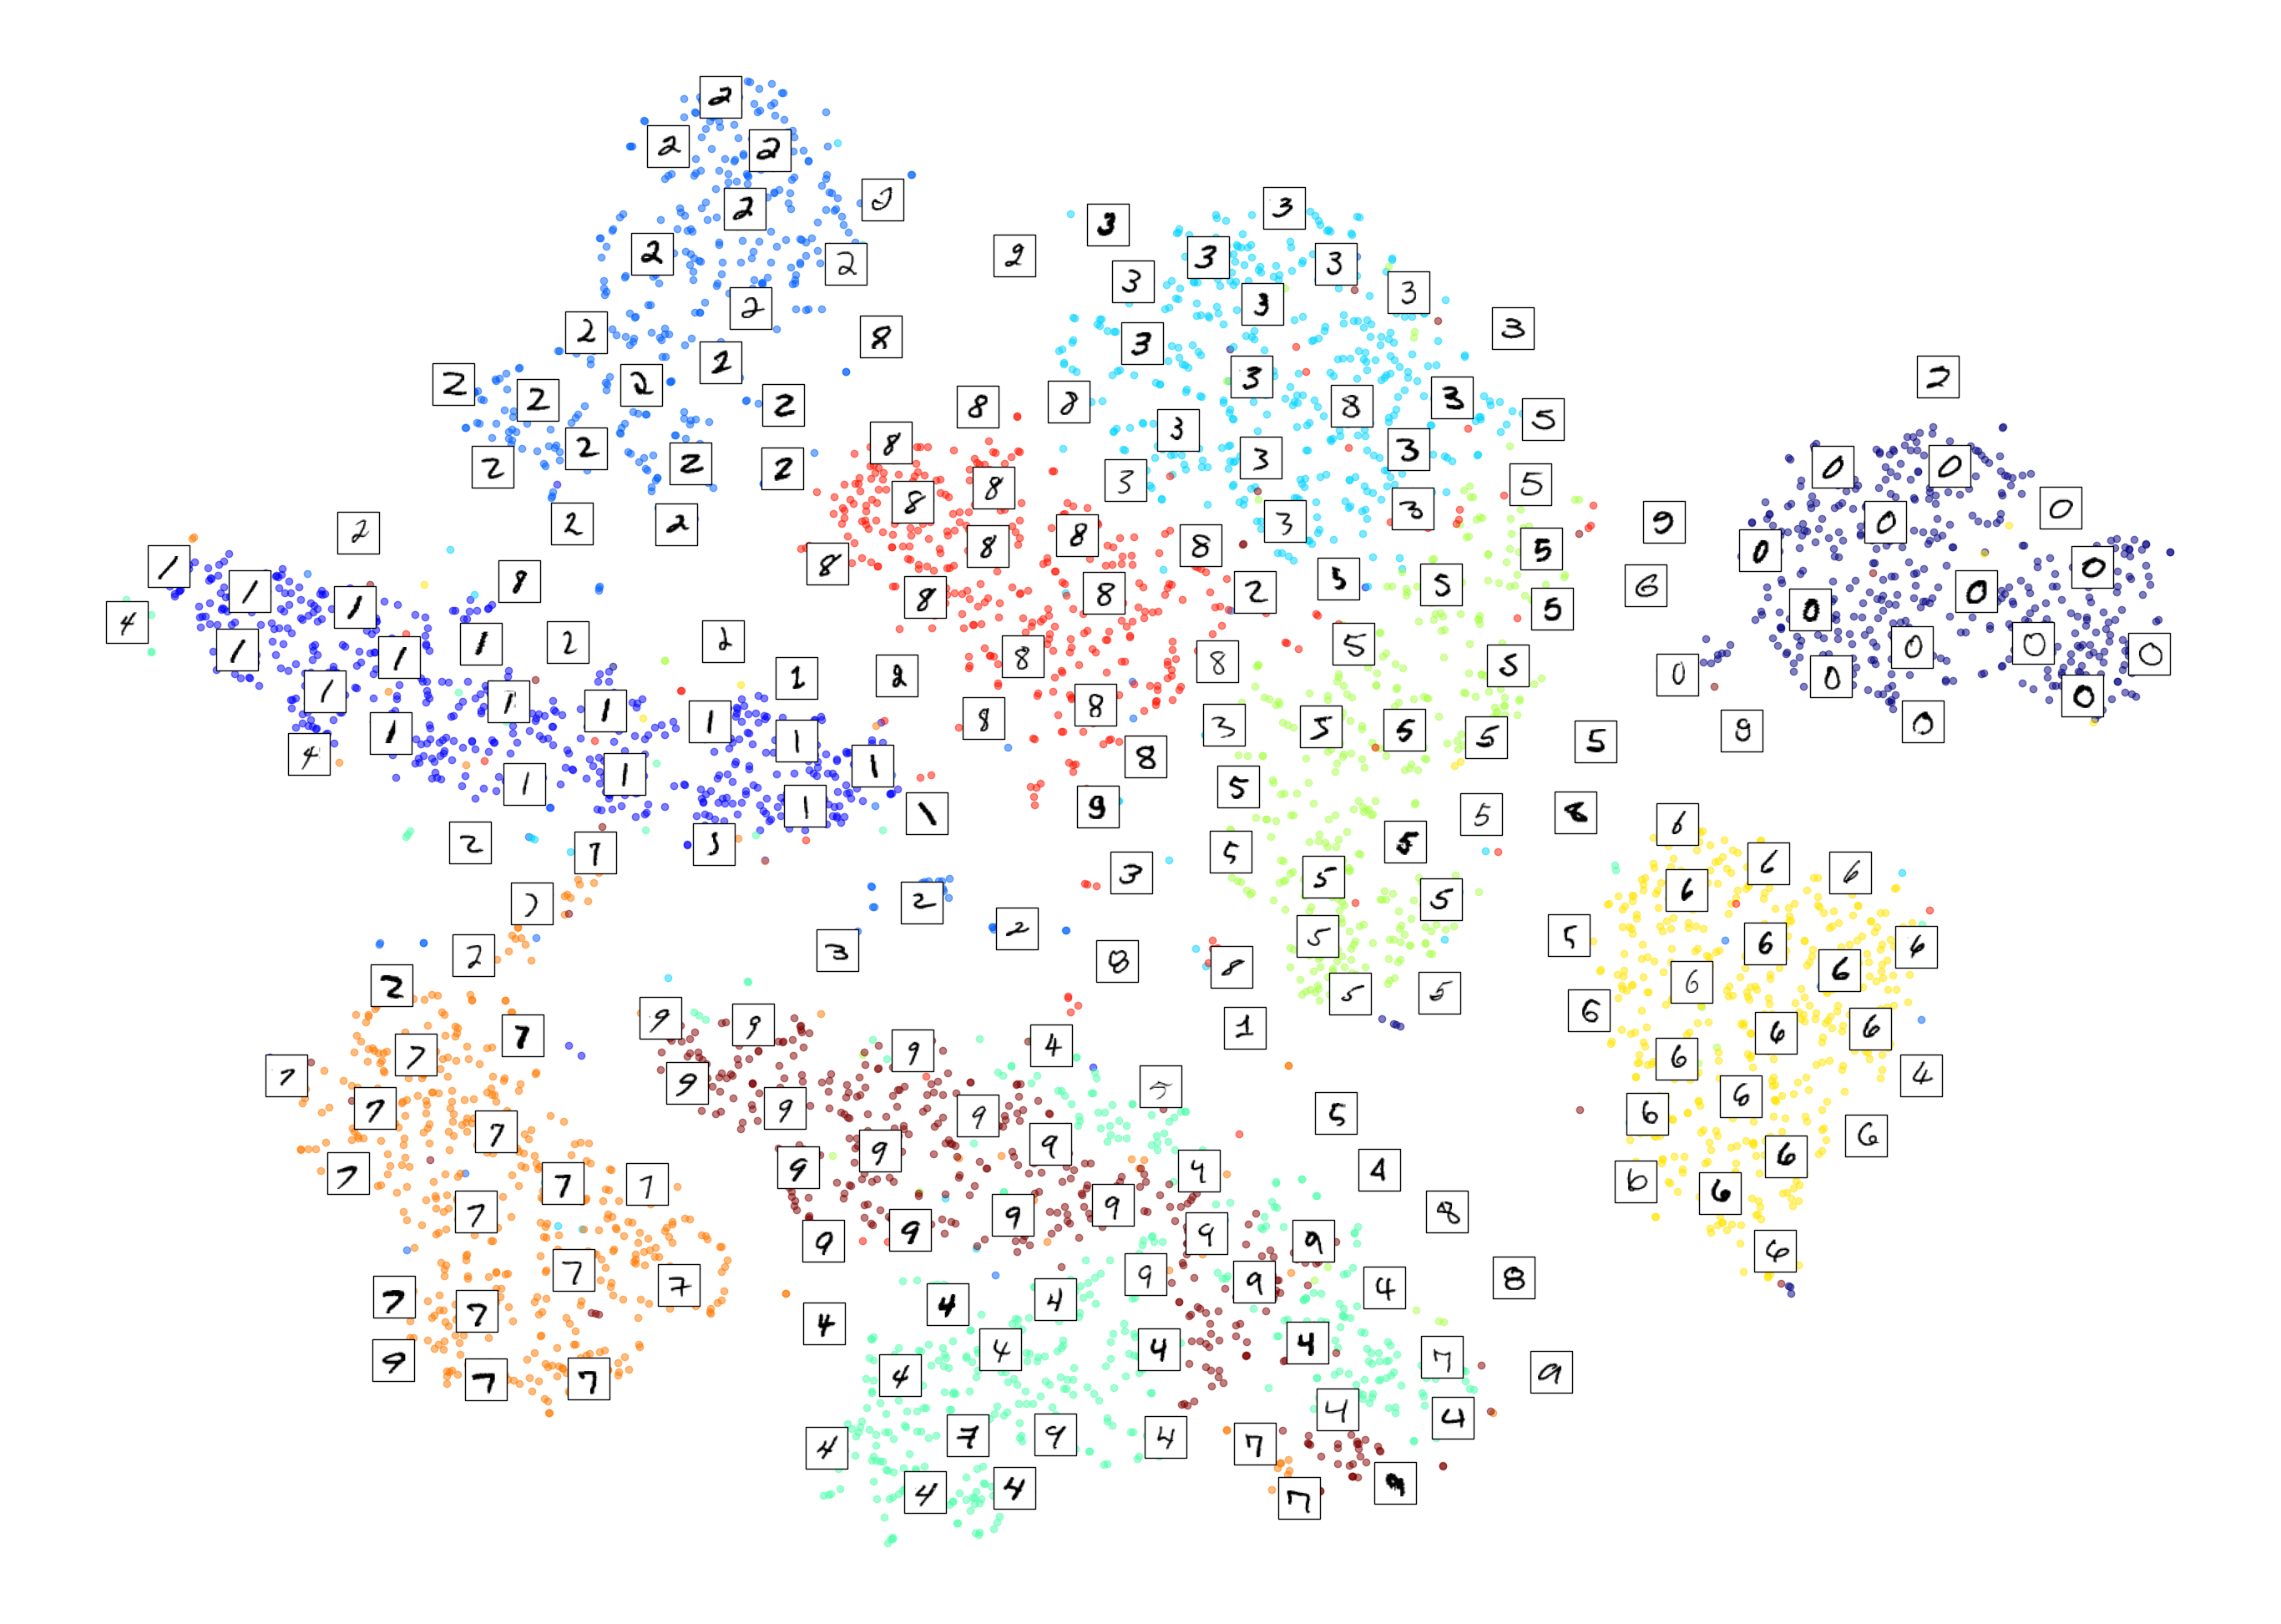

In [22]:
plot_digits(X_pcatsne_reduced, y, images=X, figsize=(35, 25))

Comment: PCA is the fastest method, while t-SNE or PCA + t-SNE gives the best visualization (t-SNE is commonly used for visualizations).

# 3. k-Means clustering [11 marks]

Hint: It is helpful to read the solution of Chapter 9, Question 10 and 11 in this [Jupyter notebook](https://github.com/ageron/handson-ml3/blob/main/09_unsupervised_learning.ipynb).

## (a) Chapter 9, Question 10 [6 marks]


The classic Olivetti faces dataset contains 400 grayscale $64\times 64$ pixel images of faces. Each image is flattened to a 1D vector of size 4096. 40 different people were photographed (10 times each), and the task is to train a model that can predict which person is represented in each picture. Load the dataset and split it into a training set and a validation set using the code below. Since the dataset is quite small, stratified sampling is used to ensure that there are the same number of images per person in each set. There is no need to create a test set.

In [23]:
from sklearn.datasets import fetch_olivetti_faces
from sklearn.model_selection import StratifiedShuffleSplit

data = fetch_olivetti_faces()
# Creating validation set
strat_split = StratifiedShuffleSplit(n_splits=1, test_size=120, random_state=42)
train_idx, val_idx = next(strat_split.split(data.data, data.target))
X_valid, y_valid = data.data[val_idx], data.target[val_idx]
# Creating training set
X_train, y_train = data.data[train_idx], data.target[train_idx]

Note that the dataset is already scaled between 0 and 1, so there is no need to use a standard scaler. Next, use PCA on the features with an explained variance ratio of 99%. Then cluster the images based on the reduced features using k-Means, where the argument `random_state=42` is included. To determine the number of clusters $k\in\{5,10,15,\dots,145\}$, (i) plot inertia, (ii) plot silhouette scores. Choose the number of clusters $k'$ based on (ii). Then (iii) plot silhouette diagrams where the number of clusters is 40 and $k'$, and explain which number of clusters is better. Finally, suppose we use $k'$ clusters, (iv) visualize the clusters by plotting the images in each cluster and comment on whether you see similar faces in each cluster.

**Solution**

The code above has created a training (70% or 280 observations) and validation set (30% or 120 observations): 7 images of each individual in the training set, 3 images in the validation set.

In [24]:
print(X_train.shape, y_train.shape)
print(X_valid.shape, y_valid.shape)

(280, 4096) (280,)
(120, 4096) (120,)


To reduce the training time for k-means, we can reduce the dimensionality using PCA. (This is something you can do, but is not required and not asked in the question. Furthermore, k-means runs in a reasonable amount of time even without PCA.)

In [25]:
from sklearn.decomposition import PCA

pca = PCA(0.99)
X_train_pca = pca.fit_transform(X_train)
X_valid_pca = pca.transform(X_valid)

pca.n_components_


200

Next, we find the appropriate number of clusters. To this end, we fit 29 k-Means models for $k=5,10,...,145$.

In [26]:
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

k_range = range(5, 150, 5)
kmeans_per_k = []
for k in k_range:
    print(f"k={k}")
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_train_pca)
    kmeans_per_k.append(kmeans)

k=5
k=10
k=15
k=20
k=25
k=30
k=35
k=40
k=45
k=50
k=55
k=60
k=65
k=70
k=75
k=80
k=85
k=90
k=95
k=100
k=105
k=110
k=115
k=120
k=125
k=130
k=135
k=140
k=145


First, we try using inertia. The plot of inertia vs $k$ does not have a clear "elbow". So, this approach does not indicate the correct $k$.

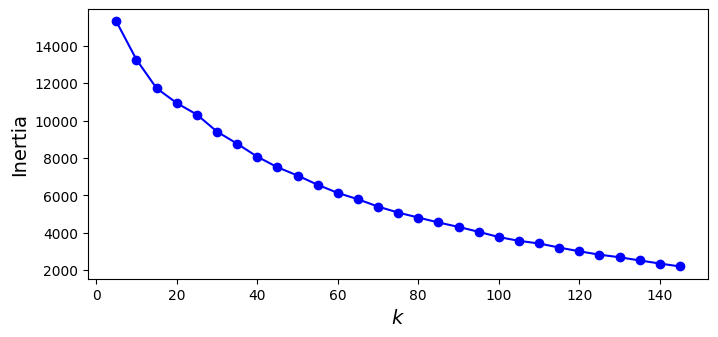

In [27]:
inertias = [model.inertia_ for model in kmeans_per_k]

plt.figure(figsize=(8, 3.5))
plt.plot(k_range, inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.show()

Next, we try using the silhouette scores. The maximum score occurs for $k=100$. Note: this number can change depending on your training set (different versions of the Python or Scikit-Learn may cause the randomness to be different than these results even when using the same seed).

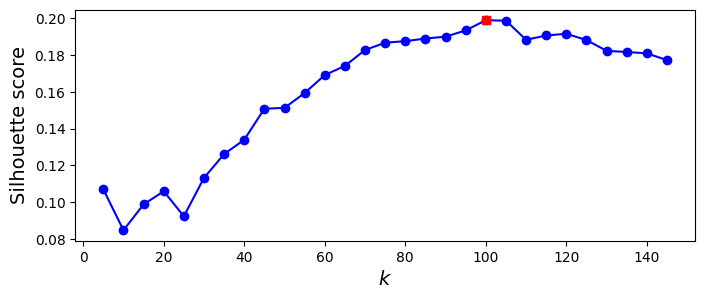

best k = 100


In [28]:
from sklearn.metrics import silhouette_score

silhouette_scores = [silhouette_score(X_train_pca, model.labels_)
                     for model in kmeans_per_k]
best_index = np.argmax(silhouette_scores)
best_k = k_range[best_index]
best_score = silhouette_scores[best_index]

plt.figure(figsize=(8, 3))
plt.plot(k_range, silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.plot(best_k, best_score, "rs")
plt.show()
print("best k = {}".format(best_k))

Now, we try using a silhouette diagram. Here, we show only two diagrams, for $k=100$ and $k=40$, because 40 is the number of natural clusters as there are 40 individuals. $k=100$ is better in the sense of having a **higher silhouette score**. On the other hand, there are bad clusters with low silhouette coefficients in both, but there are a lot more bad clusters in the $k=100$ case, so in this sense, $k=40$ looks better. The bad clusters for $k=100$ seem to be balanced out by many good clusters, which is why $k=100$ maximizes the silhouette score. This is happening because individuals may look different on different pictures, and using $k=100$ splits these out so some clusters are very homogeneous.

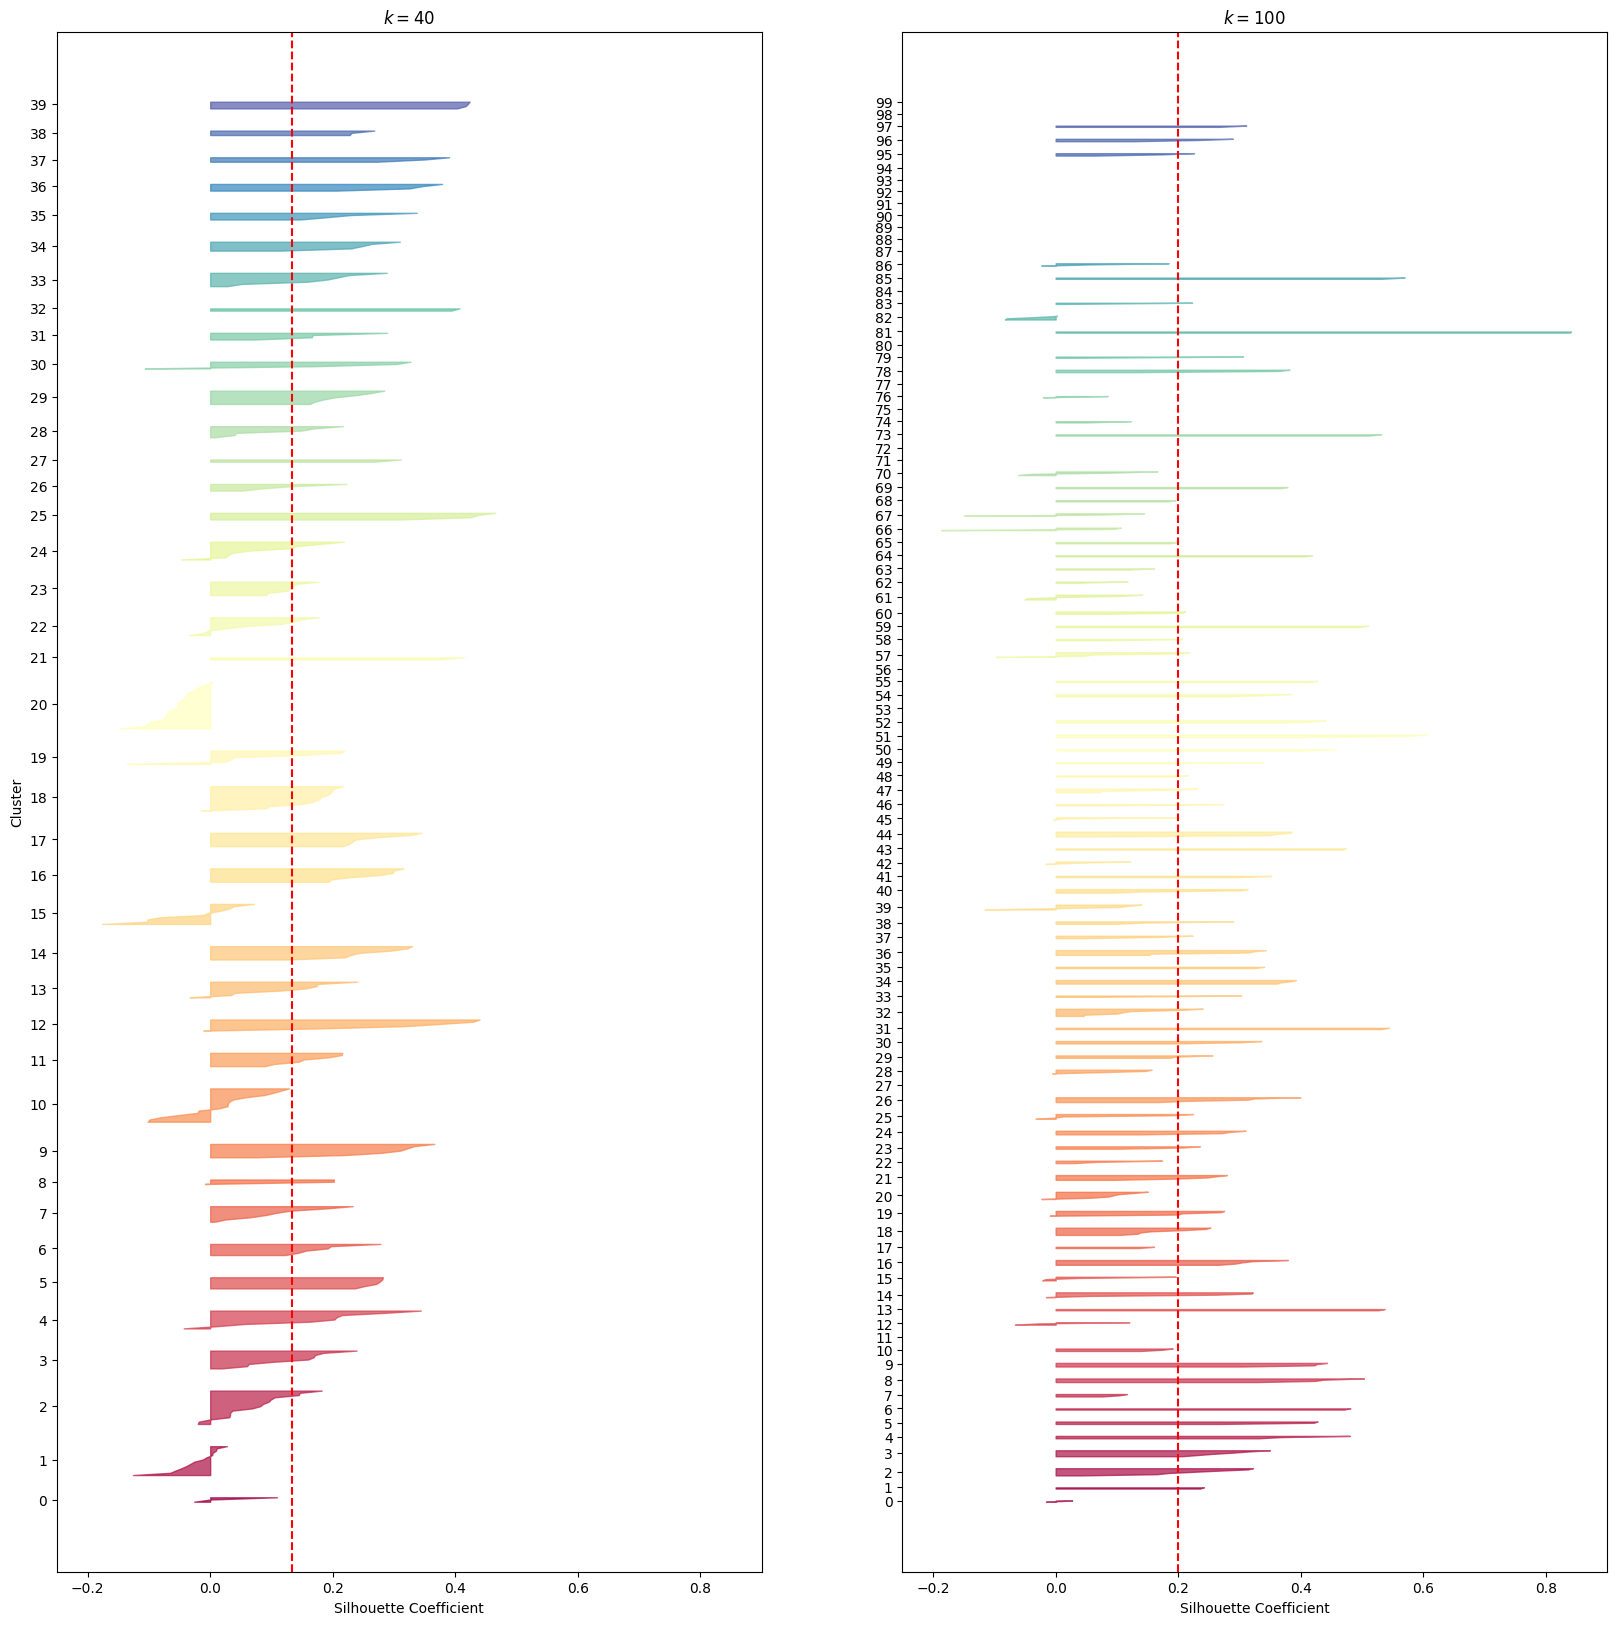

In [29]:
from sklearn.metrics import silhouette_samples
from matplotlib.ticker import FixedLocator, FixedFormatter

plt.figure(figsize=(20, 20))

for idx, model_idx in enumerate([7, best_index]):
    model = kmeans_per_k[model_idx]
    k = k_range[model_idx]
    
    plt.subplot(1, 2, idx+1)
    
    y_pred = model.labels_
    silhouette_coefficients = silhouette_samples(X_train_pca, y_pred)

    padding = len(X_train_pca) // 30
    pos = padding
    ticks = []
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()

        color = plt.cm.Spectral(i / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding
        
    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    if k == 40:
        plt.ylabel("Cluster")
    
    plt.gca().set_xticks([-0.2, 0, 0.2, 0.4, 0.6, 0.8, 1])
    plt.xlabel("Silhouette Coefficient")

    plt.axvline(x=silhouette_scores[model_idx], color="red", linestyle="--")
    plt.title(f"$k={k}$")
    plt.xlim(-0.25, 0.9)
plt.show()


Finally, we visualize the clusters. We do this for $k=100$.

Cluster 0


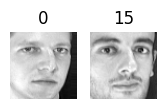

Cluster 1


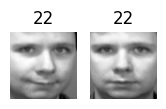

Cluster 2


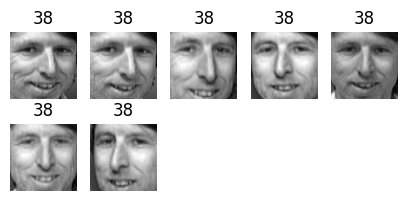

Cluster 3


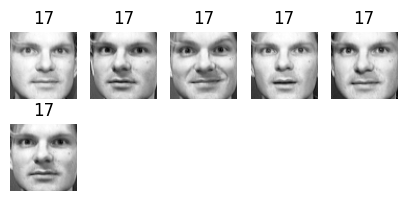

Cluster 4


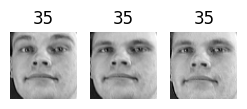

Cluster 5


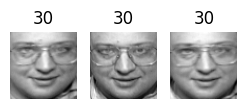

Cluster 6


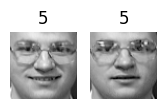

Cluster 7


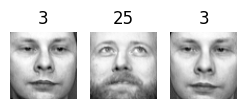

Cluster 8


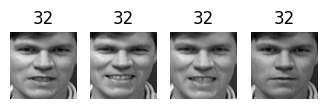

Cluster 9


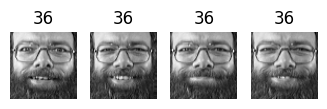

Cluster 10


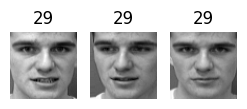

Cluster 11


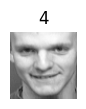

Cluster 12


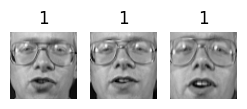

Cluster 13


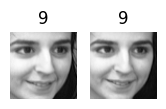

Cluster 14


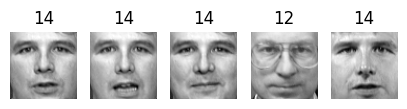

Cluster 15


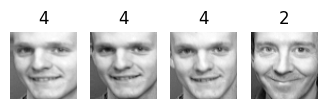

Cluster 16


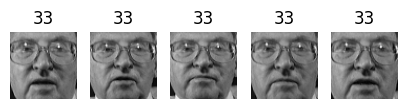

Cluster 17


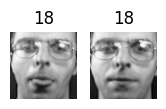

Cluster 18


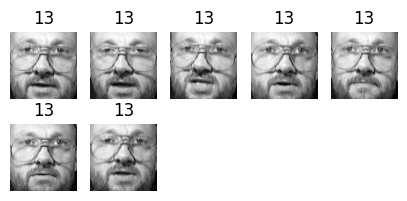

Cluster 19


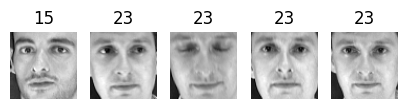

Cluster 20


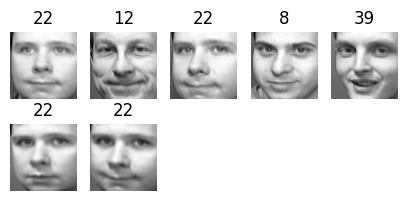

Cluster 21


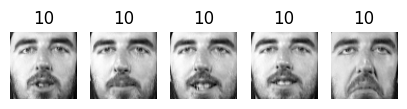

Cluster 22


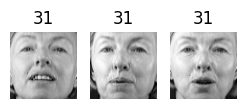

Cluster 23


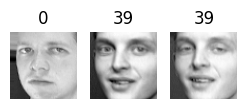

Cluster 24


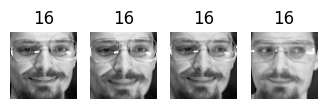

Cluster 25


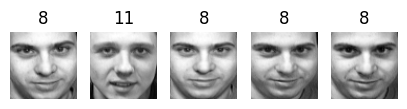

Cluster 26


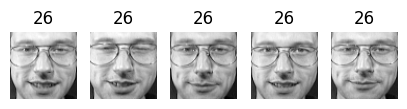

Cluster 27


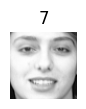

Cluster 28


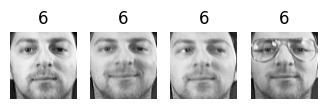

Cluster 29


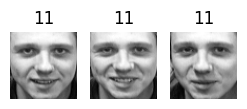

Cluster 30


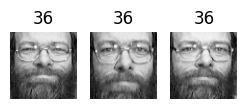

Cluster 31


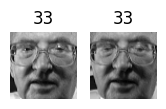

Cluster 32


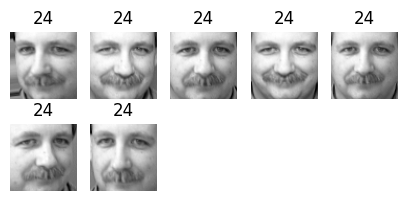

Cluster 33


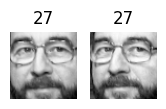

Cluster 34


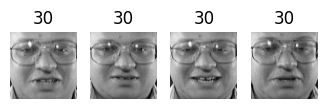

Cluster 35


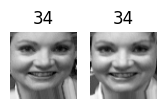

Cluster 36


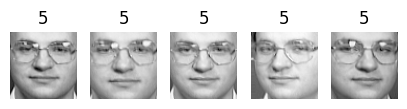

Cluster 37


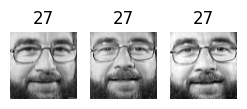

Cluster 38


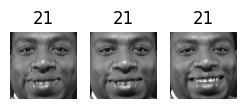

Cluster 39


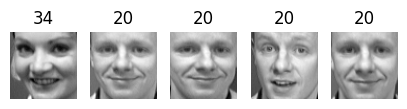

Cluster 40


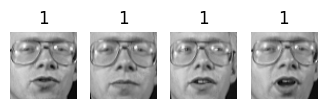

Cluster 41


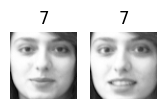

Cluster 42


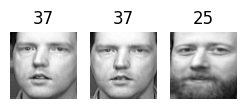

Cluster 43


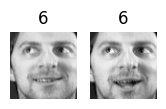

Cluster 44


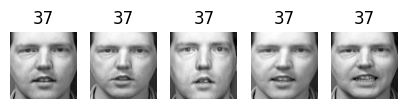

Cluster 45


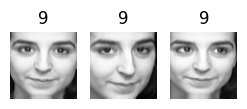

Cluster 46


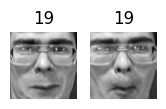

Cluster 47


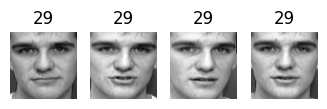

Cluster 48


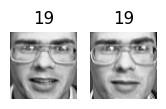

Cluster 49


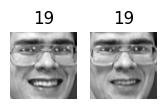

Cluster 50


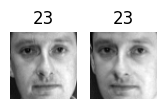

Cluster 51


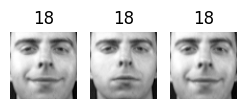

Cluster 52


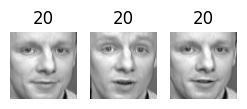

Cluster 53


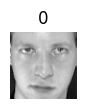

Cluster 54


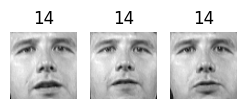

Cluster 55


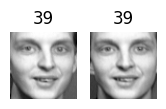

Cluster 56


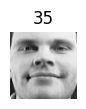

Cluster 57


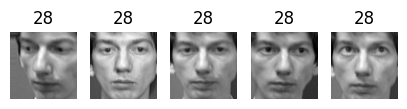

Cluster 58


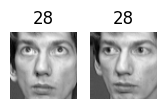

Cluster 59


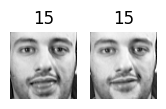

Cluster 60


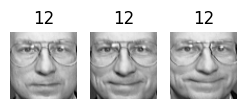

Cluster 61


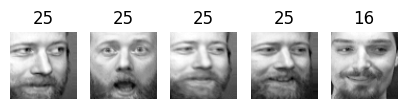

Cluster 62


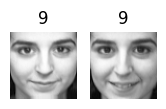

Cluster 63


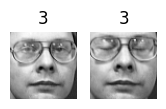

Cluster 64


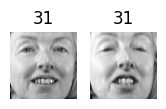

Cluster 65


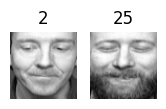

Cluster 66


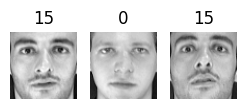

Cluster 67


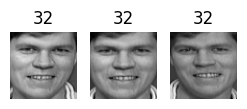

Cluster 68


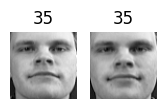

Cluster 69


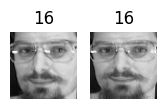

Cluster 70


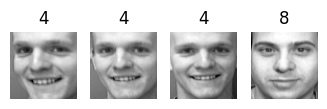

Cluster 71


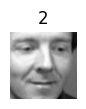

Cluster 72


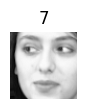

Cluster 73


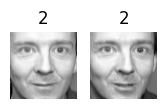

Cluster 74


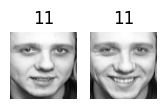

Cluster 75


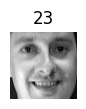

Cluster 76


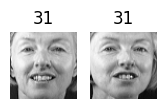

Cluster 77


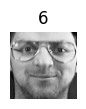

Cluster 78


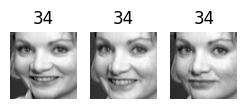

Cluster 79


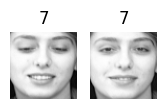

Cluster 80


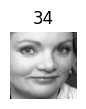

Cluster 81


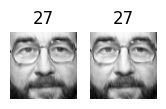

Cluster 82


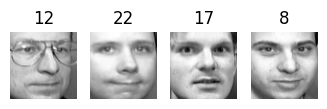

Cluster 83


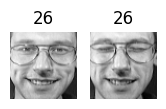

Cluster 84


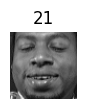

Cluster 85


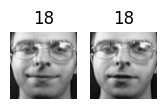

Cluster 86


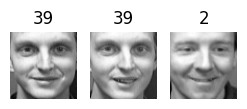

Cluster 87


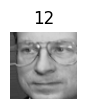

Cluster 88


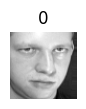

Cluster 89


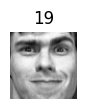

Cluster 90


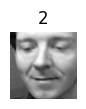

Cluster 91


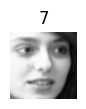

Cluster 92


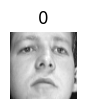

Cluster 93


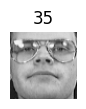

Cluster 94


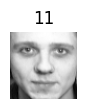

Cluster 95


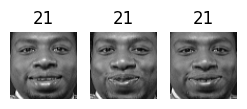

Cluster 96


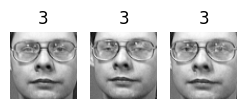

Cluster 97


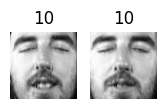

Cluster 98


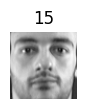

Cluster 99


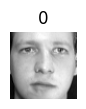

In [30]:
best_model = kmeans_per_k[best_index]

def plot_faces(faces, labels, n_cols=5):
    faces = faces.reshape(-1, 64, 64)
    n_rows = (len(faces) - 1) // n_cols + 1
    plt.figure(figsize=(n_cols, n_rows * 1.1))
    for index, (face, label) in enumerate(zip(faces, labels)):
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(face, cmap="gray")
        plt.axis("off")
        plt.title(label)
    plt.show()

for cluster_id in np.unique(best_model.labels_):
    print("Cluster", cluster_id)
    in_cluster = best_model.labels_==cluster_id
    faces = X_train[in_cluster]
    labels = y_train[in_cluster]
    plot_faces(faces, labels)

## (b) [2 marks]

Continue to use the reduced features based on PCA in (a). Train a random forest classifier `RandomForestClassifier(n_estimators=150, random_state=42)` and a histogram-based gradient boosting classifier using `HistGradientBoostingClassifier(max_iter=200, random_state=42, early_stopping=True, validation_fraction=0.2)` to predict which person is represented in each picture, and evaluate it on the validation set. For the gradient boosting classifier state the optimal number of iterations from early stopping. State which of the two models is better.

**Solution**

(i) We train a random forest classifier to predict which person is represented in each picture, and evaluate it on the validation set.

In [31]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=150, random_state=42)
clf.fit(X_train_pca, y_train)
clf.predict(X_valid_pca)

array([30, 18, 16,  9, 17, 24, 17, 37, 36, 37,  5, 35, 36, 25, 38, 22, 26,
       14,  7, 32, 35, 36, 34, 16, 34, 21, 30,  8, 11, 22,  9,  7, 27, 33,
       15, 25,  3,  7, 18,  7, 32, 24, 28, 29, 25,  4, 13, 19,  5, 25, 27,
       11, 30, 34, 20, 19, 28,  5,  6, 15, 31, 10, 26, 14, 26,  1, 38, 10,
       18,  8, 20, 20,  1,  0, 33, 29, 23,  6, 39, 37, 31, 22, 32, 31, 39,
       10, 17, 20,  6, 10, 23, 11,  1, 14, 29, 23, 38, 28, 21,  2, 27, 12,
       12,  7,  1, 21,  8,  6, 39, 24, 13,  4, 15,  2, 33,  5, 35, 19, 24,
        2])

In [32]:
clf.score(X_valid_pca, y_valid)

0.925

In [33]:
from sklearn.ensemble import HistGradientBoostingClassifier

hgb = HistGradientBoostingClassifier(max_iter=200, random_state=42, early_stopping=True, validation_fraction=0.2)
hgb.fit(X_train_pca, y_train)
hgb.predict(X_valid_pca)

array([30, 18, 24,  9, 17, 24, 12, 37, 36, 37,  4, 35, 36, 36, 38, 22, 26,
       14,  7, 32, 14, 36, 34, 16, 34, 21, 12,  8, 11, 25,  9,  7, 27, 33,
       15, 25,  3, 21, 18,  7, 32, 24, 28, 29,  2, 29, 13, 19,  5, 25, 27,
       11, 12, 34,  3, 19, 28,  5,  6, 15, 31, 10, 26, 14, 26,  1, 21, 10,
        9,  8,  3, 25,  0, 11, 21, 29, 23,  6, 39, 37, 15, 22, 32, 31, 39,
       16, 17, 20, 27, 10, 23, 11,  1, 14, 29, 23, 38, 32, 21, 34, 27, 12,
        5,  7,  1, 21,  8, 15,  8, 37, 13,  4, 15,  2, 33,  5, 35, 34, 24,
        2])

In [34]:
hgb.n_iter_

85

In [35]:
hgb.score(X_valid_pca, y_valid)

0.7666666666666667

The random forest has much higher accuracy on the validation set 92.5% compared to 76.7% for the histogram-based gradient booster. The optimal number of iterations for the gradient boost is 85.

## (c) Chapter 9, Question 11 [4 marks]

Continuing on from (b), regardless of which model is better, use the random forest classifier. Next, use k-Means as a dimensionality reduction tool, and train a classifier. Search for the number of clusters $k\in\{5,10,15,\dots,145\}$ that allows the classifier to get the best performance on the validation set. What performance can you reach on the validation set? What if you append the features from the reduced set to the original features and again search for the best number of clusters?

**Solution**

(i) We use k-Means (the best choice of $k$ from (a) which is 100) as a dimensionality reduction tool, and train a classifier on the reduced set.

In [36]:
best_model

KMeans(n_clusters=100, random_state=42)

In [37]:
X_train_reduced = best_model.transform(X_train_pca)
X_valid_reduced = best_model.transform(X_valid_pca)

clf = RandomForestClassifier(n_estimators=150, random_state=42)
clf.fit(X_train_reduced, y_train)
clf.score(X_valid_reduced, y_valid)

0.7666666666666667

Note: The performance of 76.7% accuracy is worse than random forest without the k-means reduction, as expected. Reducing features usually makes performance worse (but faster). The above setp is not necessary. The question does not explicitly ask for this model to be evaluated, and then there is no point in fitting a model that is not used (the textbook's Jupyter Notebook does this evaluation without being asked to in the question).

(ii) We search for the number of clusters that allows the classifier to get the best performance.

In [38]:
from sklearn.pipeline import Pipeline

valid_score_k = []
for n_clusters in k_range:
    pipeline = Pipeline([
        ("kmeans", KMeans(n_clusters=n_clusters, random_state=42)),
        ("forest_clf", RandomForestClassifier(n_estimators=150, random_state=42))
    ])
    pipeline.fit(X_train_pca, y_train)
    current_score = pipeline.score(X_valid_pca, y_valid)
    valid_score_k.append(current_score)
    print(n_clusters, current_score)

5 0.39166666666666666
10 0.6083333333333333
15 0.6416666666666667
20 0.6833333333333333
25 0.7166666666666667
30 0.725
35 0.7416666666666667
40 0.7416666666666667
45 0.7416666666666667
50 0.7583333333333333
55 0.7583333333333333
60 0.7666666666666667
65 0.7416666666666667
70 0.775
75 0.8083333333333333
80 0.8083333333333333
85 0.7916666666666666
90 0.8
95 0.8
100 0.7666666666666667
105 0.7833333333333333
110 0.8166666666666667
115 0.775
120 0.7666666666666667
125 0.8166666666666667
130 0.8166666666666667
135 0.8083333333333333
140 0.7833333333333333
145 0.775


The best number of clusters is 110, with validation score 81.7%. A lot worse than the score 92.5% without any k-Means dimensionality reduction.

In [39]:
k_range[np.argmax(valid_score_k)]

110

(iii) Append the features from the reduced set to the original features and again search for the best number of clusters.

In [40]:
valid_score_extended_k = []
for idx, model in enumerate(kmeans_per_k):
    X_train_reduced = model.transform(X_train_pca)
    X_valid_reduced = model.transform(X_valid_pca)
    X_train_extended = np.c_[X_train_pca, X_train_reduced]
    X_valid_extended = np.c_[X_valid_pca, X_valid_reduced]
    clf = RandomForestClassifier(n_estimators=150, random_state=42)
    clf.fit(X_train_extended, y_train)
    current_score = clf.score(X_valid_extended, y_valid)
    valid_score_extended_k.append(current_score)
    print(k_range[idx], current_score)

5 0.925
10 0.8916666666666667
15 0.9083333333333333
20 0.8833333333333333
25 0.875
30 0.8916666666666667
35 0.8916666666666667
40 0.9
45 0.9
50 0.875
55 0.8666666666666667
60 0.8833333333333333
65 0.8583333333333333
70 0.9083333333333333
75 0.8416666666666667
80 0.8916666666666667
85 0.8833333333333333
90 0.825
95 0.875
100 0.8916666666666667
105 0.85
110 0.875
115 0.8666666666666667
120 0.85
125 0.9083333333333333
130 0.9
135 0.8583333333333333
140 0.85
145 0.85


The best number of clusters is 5, with validation score 92.5%. That's the same as the original score. If we didn't search for the optimal $k$, and just appended the reduced set to the original features (that was with $k=100$), then we would have got only a 89.1% score, which is worse than the original.

In [41]:
k_range[np.argmax(valid_score_extended_k)]

5

# 4. Finding regimes in time series [12 marks]

## (a) [6 marks]
Obtain the daily values of the CPI and unemployment rate from FRED up to 2023-01-01 and then convert the CPI into the yearly inflation rate `inf_data` using the following code. Note that you may have to install the package `pandas_datareader`. Alternatively, you can download the data as a csv file from [Canvas](https://canvas.uw.edu/files/105781273/download?download_frd=1).

In [42]:
import pandas_datareader as pdr
import pandas as pd
from datetime import datetime

unemp_data = pdr.get_data_fred('UNRATE', datetime(1945,1,1),datetime(2023,1,1))
cpi_data = pdr.get_data_fred('CPIAUCSL', datetime(1945,1,1),datetime(2023,1,1))
inf_data = (cpi_data/cpi_data.shift(12)-1).iloc[12:]
data = pd.concat([inf_data, unemp_data],axis=1)

Split the data into a training set (before Jan 2005, using `data[:"2005-1-1"]` for instance) and a test set (Jan 2005 and after). Now, ignore the time aspect of your training set by treating it as a 2-dimensional dataset. Use k-means to divide your training set into a number of clusters called **regimes**. To find the number of regimes (clusters) $k\in\{2,3,\dots,10\}$: (i) plot inertia, (ii) plot silhouette scores, (iii) plot silhouette diagrams for $k\in\{2,3,\dots,10\}$. How many regimes do you choose? Explain your answer. Recall that you should use a standard scaler before applying k-means.

**Solution**

In [43]:
data

CPIAUCSL  UNRATE
DATE                        
1948-01-01  0.102421     3.4
1948-02-01  0.094820     3.8
1948-03-01  0.068182     4.0
1948-04-01  0.082727     3.9
1948-05-01  0.093850     3.5
...              ...     ...
2022-09-01  0.081983     3.5
2022-10-01  0.077519     3.6
2022-11-01  0.071195     3.6
2022-12-01  0.064115     3.5
2023-01-01  0.063621     3.4

[901 rows x 2 columns]

Split into training and test.

In [44]:
data_train = data.loc[:"2005-1-1"] 
data_test = data.loc["2005-1-1":]

Now apply k-Means for $k=2,3,...,10$.

In [45]:
from sklearn.cluster import KMeans
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

scaler = Pipeline([('scaler', StandardScaler())
               ])

k_values = range(2, 10)
X = scaler.fit_transform(data_train.values)
kM_models = []
for idx, k in enumerate(k_values):
    kmeans = KMeans(n_clusters=k, random_state=42).fit(X)
    kM_models.append(kmeans)
    print("\rStep {}/{}, k={}   ".format(idx+1, len(k_values), k), end="")

Step 8/8, k=9   

Here is the inertia plot. There is no clear elbow. It looks like it could be $k=4$ or $5$.

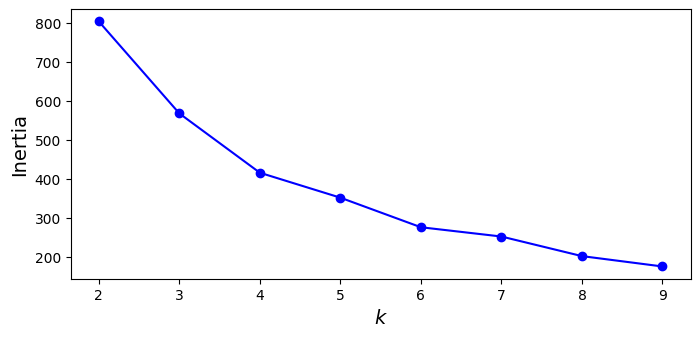

In [46]:
inertias = [model.inertia_ for model in kM_models]

plt.figure(figsize=(8, 3.5))
plt.plot(k_values, inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.show()

Using the silhouette scores, we find that the maximum score is $k=2$, so, the silhouette scores suggest $k=2$.

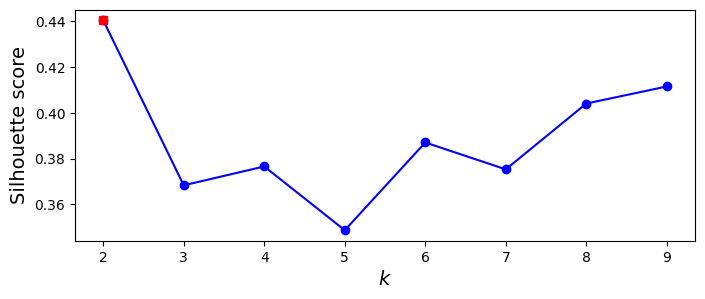

best k = 2


In [47]:
from sklearn.metrics import silhouette_score

silhouette_scores = [
    silhouette_score(X, model.labels_)
    for model in kM_models
]
best_index = np.argmax(silhouette_scores)
best_k = k_values[best_index]
best_score = silhouette_scores[best_index]

plt.figure(figsize=(8, 3))
plt.plot(k_values, silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.plot(best_k, best_score, "rs")
plt.show()
print("best k = {}".format(best_k))

Finally, we find the silhouette diagrams for different $k$. For $k=2$, there is a bad cluster with silhouette coefficients (cluster 1), which is lower than for the clusters for all the other values of $k$ (but the largest cluster being good explains why the silhouette score calculated above is higher such that this gives the best overall silhouette score). The quality of the clusters as measured by the silhouette coefficients are all good when $k\geq 4$, and there are no bad clusters with low silhouette coefficients. So $k=4$ looks like a good choice, but the rest looks mostly similar to this, although $k=6,7$ have a cluster with some negative (bad) silhouette scores.

Overall, the silhouette diagrams all look roughly similar in terms of the quality of clustering, though $k=3,4$ are probably the best. In the examples below we will take $k=2$ since this has the highest silhouette score. You could also try $k=3,4,5$.

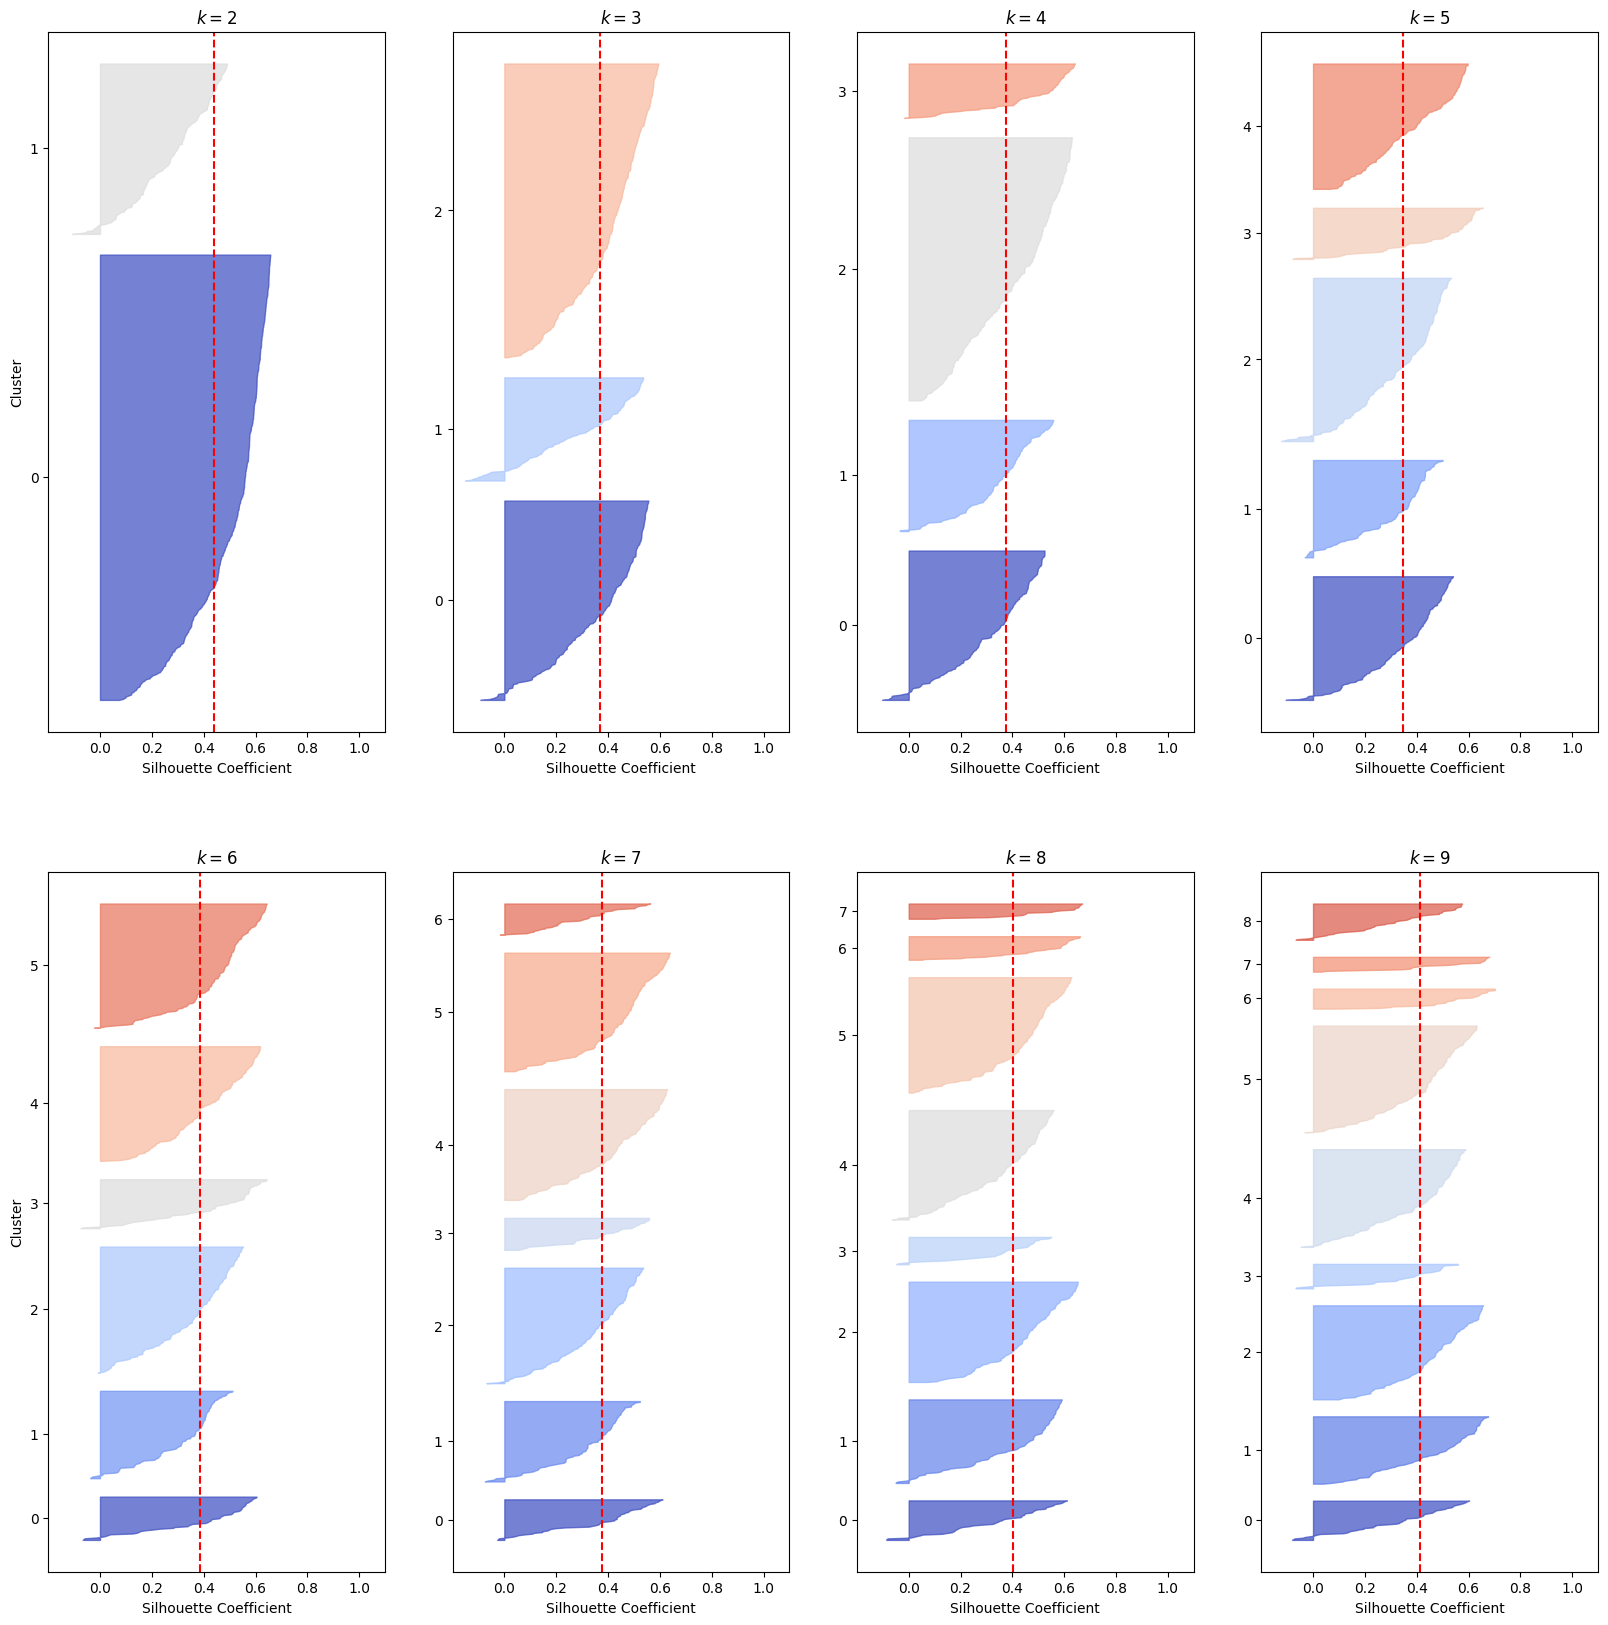

In [48]:
from sklearn.metrics import silhouette_samples
from matplotlib.ticker import FixedLocator, FixedFormatter

plt.figure(figsize=(20, 20))

for idx, model in enumerate(kM_models):
    k = k_values[idx]
    
    plt.subplot(2, 4, idx+1)
    
    y_pred = model.labels_
    silhouette_coefficients = silhouette_samples(X, y_pred)

    padding = len(X) // 30
    pos = padding
    ticks = []
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()

        color = mpl.cm.coolwarm(i / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    if k in (2, 6):
        plt.ylabel("Cluster")
    
    plt.gca().set_xticks([-0.5, 0, 0.2, 0.4, 0.6, 0.8, 1])
    plt.xlabel("Silhouette Coefficient")
        
    plt.axvline(x=silhouette_scores[idx], color="red", linestyle="--")
    plt.title(f"$k={k}$")
    plt.xlim(-.2, 1.1)
plt.show()

## (b) [3 marks]

Report the centroid of the regimes in (a). For the training set, plot the inflation rate (x-axis) vs unemployment rate (y-axis) after these features have been standardized, and show the regimes and centroids in the plot. For the test set, plot time series of the inflation rate and unemployment rate (the original series before standardization), and show the regimes on the plot. The regimes can be shown using time series (line graphs) of the centroid for each of two series for instance, and the following code can be used, where `best_mod_pred` is the prediction on the test set from the best model.

In [49]:
# regimes_train = pd.DataFrame(data_test.iloc[:,1]).assign(
#     regime = clusters[best_mod_pred][:,1].flatten()
# )

# plt.figure(figsize=(12,6))
# plt.plot(regimes_train["UNRATE"], label="vol", alpha=.3)
# plt.plot(regimes_train["regime"], '-k', label="regime")

**Solution**

Plot the cluster

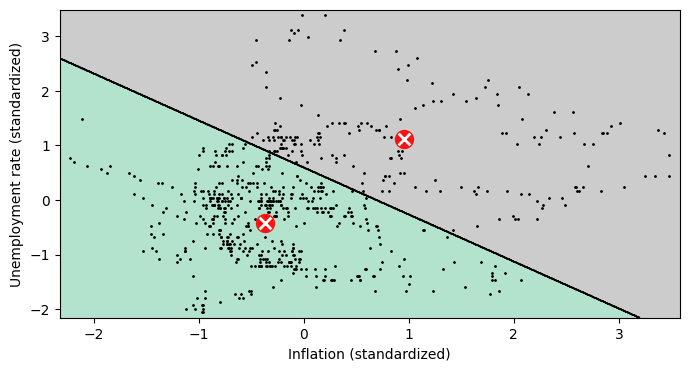

inertia = 804.0052311329154


In [50]:
def plot_centroids(centroids, weights=None, circle_color='r', cross_color='w'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=35, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=2, linewidths=12,
                color=cross_color, zorder=11, alpha=1)
    
def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)
    plt.xlabel("Inflation (standardized)")
    plt.ylabel("Unemployment rate (standardized)")
    
def plot_kmc(X, k, random_state=42):
    kmc = KMeans(n_clusters=k, random_state=random_state)
    kmc.fit(X)
    centeroids = kmc.cluster_centers_
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    resolution = 1000
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = kmc.predict(np.c_[xx.ravel(), yy.ravel()])

    plt.figure(figsize=(8, 4))
    plot_data(X)
    plot_centroids(centeroids)
    Z = Z.reshape(xx.shape)
    plt.contourf(
        Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
        cmap="Pastel2"
    )
    plt.contour(
        Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
        linewidths=1, colors='k'
    )
    plt.show()
    print("inertia = {}".format(kmc.inertia_))

plot_kmc(X,2,42)

Here are the centroids (on the transformed scale).

In [51]:
best_model = kM_models[0]
clusters = best_model.cluster_centers_
print(clusters)
clusters = scaler.inverse_transform(clusters) # Centriod on original scale

[[-0.36733388 -0.42687218]
 [ 0.95700143  1.11211437]]


Now plot a time series of the test set on the original scale with the centriods.

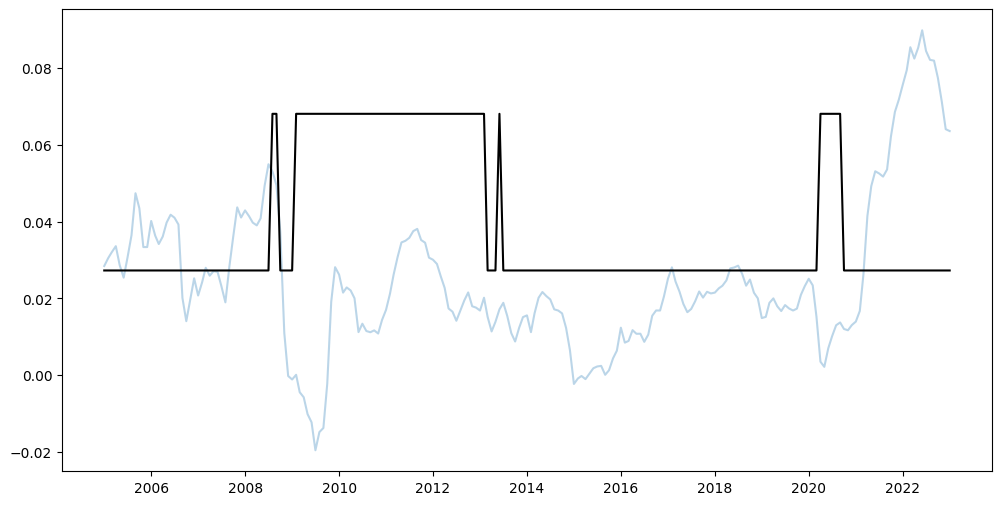

In [52]:
data_test_scaled = scaler.transform(data_test.values)
best_mod_pred = best_model.predict(data_test_scaled)
regimes_train = pd.DataFrame(data_test.iloc[:,0]).assign(
    regime = clusters[best_mod_pred][:,0].flatten()
)

plt.figure(figsize=(12,6))
plt.plot(regimes_train["CPIAUCSL"], label="vol", alpha=.3)
plt.plot(regimes_train["regime"], '-k', label="regime")

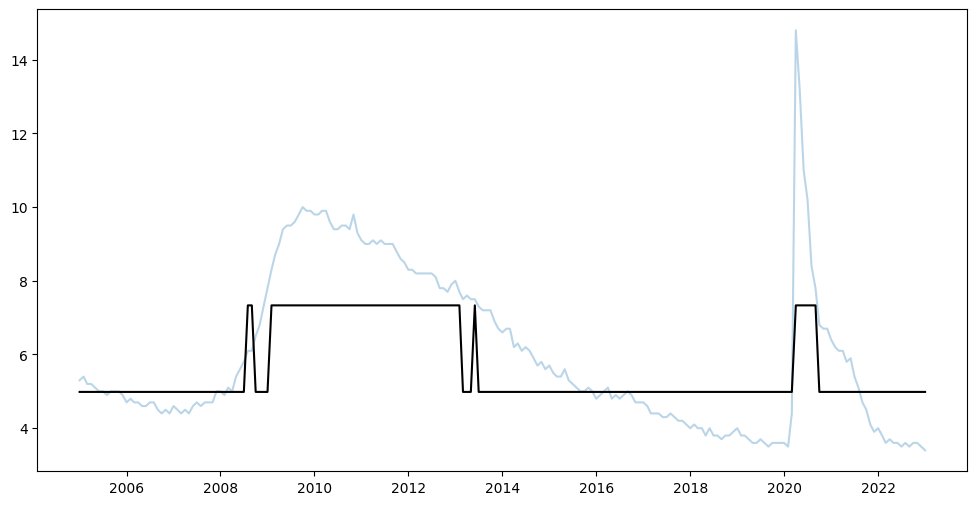

In [53]:
regimes_train = pd.DataFrame(data_test.iloc[:,1]).assign(
    regime = clusters[best_mod_pred][:,1].flatten()
)

plt.figure(figsize=(12,6))
plt.plot(regimes_train["UNRATE"], label="vol", alpha=.3)
plt.plot(regimes_train["regime"], '-k', label="regime")

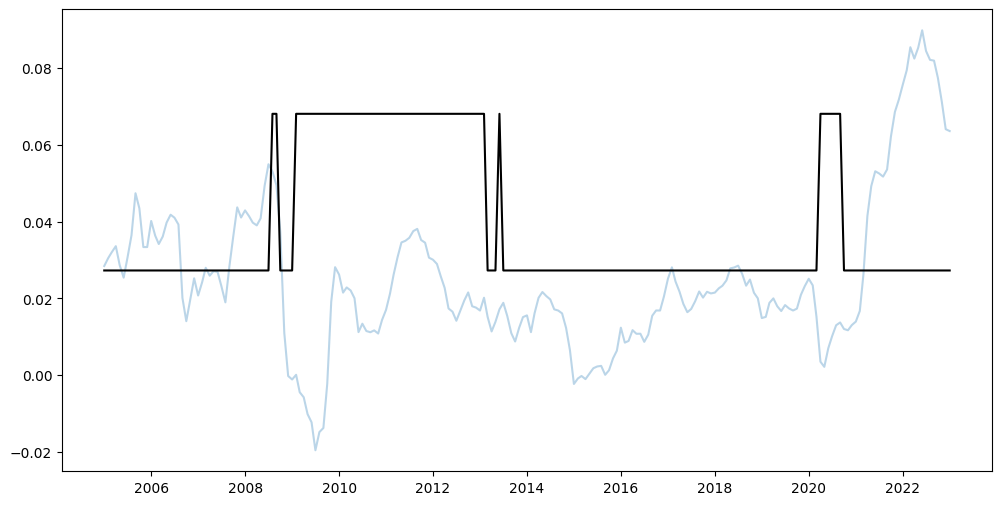

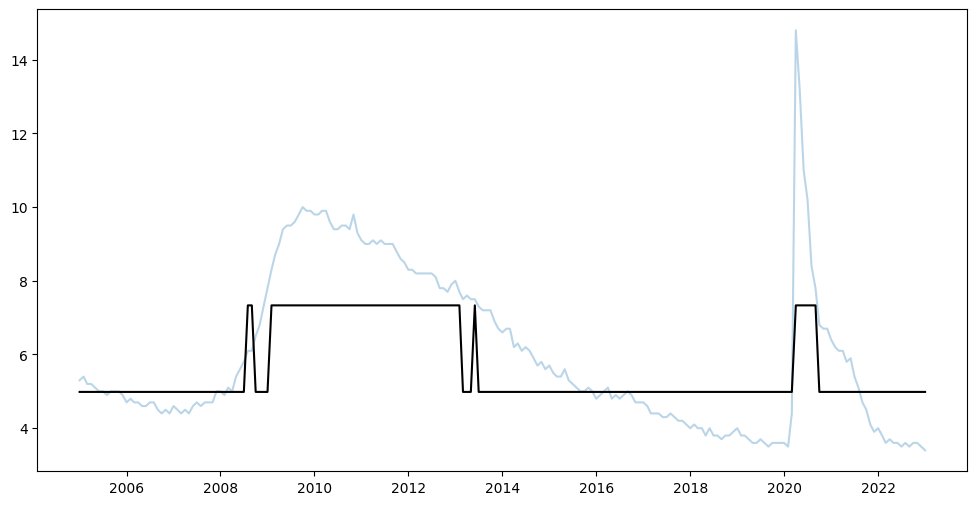

In [54]:
data_test_scaled = scaler.transform(data_test.values)
best_mod_pred = best_model.predict(data_test_scaled)

regimes_train = pd.DataFrame(data_test.iloc[:,0]).assign(
    regime = clusters[best_mod_pred][:,0].flatten()
)

plt.figure(figsize=(12,6))
plt.plot(regimes_train["CPIAUCSL"], label="vol", alpha=.3)
plt.plot(regimes_train["regime"], '-k', label="regime")


regimes_train = pd.DataFrame(data_test.iloc[:,1]).assign(
    regime = clusters[best_mod_pred][:,1].flatten()
)

plt.figure(figsize=(12,6))
plt.plot(regimes_train["UNRATE"], label="vol", alpha=.3)
plt.plot(regimes_train["regime"], '-k', label="regime")

## (c) [3 marks]

A regime-switching model is a probabilistic model that governs how regime transitions take place. A very simple regime-switching model is a Markov chain. Here, we assume that the next month's regime depends on the current regime. In other words, all we need to know are the **transition probabilities** $p_{i,j} = \mathbb{P}(X_{t+1}=j|X_t=i)$, where $X_t$ is the regime at day $t$. Using the time series of regimes in the training set that you found in (b), estimate these transition probabilities, as follows:
\begin{align*}
    p_{i,j} = \frac{\mathbb{P}(X_{t+1}=j \text{ and } X_t=i)}{\mathbb{P}(X_t=i)}\approx \frac{\text{number of transition from regime $i$ to $j$}}{\text{number of transition from regime $i$}}
\end{align*}
Next, let us check how good your regime switching model is. Calculate the transition probabilities using the test set. Do not retrain your k-means clusterer, simply use it to predict the regimes of the test set. Then, repeat the estimation of the transition probabilities on the test set.

Note: Depending on your choice of $k$, it is possible that some $p_{i,j}$ cannot be estimated due to  having no transitions from regime $i$.

**Solution**

(i) Training set. The following code counts the number of transitions from regime $i$ to regime $j$ in the training data.

In [55]:
k = best_model.get_params()['n_clusters']
transition_mat = np.zeros((k,k))
for t in range(len(best_model.labels_)-1):
    i = best_model.labels_[t]
    j = best_model.labels_[t+1]
    transition_mat[i,j] += 1.
transition_mat

array([[490.,   4.],
       [  4., 186.]])

For example, there are 490 transitions from regime 0 to regime 0, and 4 from regime 0 to regime 1, etc. To get the probabilities, we only need to divide by the matrix row sum. The row sum is the total number of transitions from the regime corresponding to that row.

In [56]:
P_train = transition_mat/(transition_mat.sum(axis=1).reshape(-1,1))
P_train

array([[0.99190283, 0.00809717],
       [0.02105263, 0.97894737]])

We can put these calculations in a function.

In [57]:
def transition_prob(model,X):
    k = model.get_params()['n_clusters']
    transition_mat = np.zeros((k,k))
    transitions = model.predict(X)
    for t in range(len(transitions)-1):
        i = transitions[t]
        j = transitions[t+1]
        transition_mat[i,j] += 1.
    return (
        transition_mat / transition_mat.sum(axis=1).reshape(-1,1)
    )

(ii) Test set.

The corresponding transition probabilities for the test set is as follows:

In [58]:
X_test = scaler.transform(data_test.values)

In [59]:
P_test = transition_prob(best_model,X_test)
P_test

array([[0.97468354, 0.02531646],
       [0.06896552, 0.93103448]])

## Alternative solutions to (b) and (c) for different clusters

Here are the answers if using $k=3,4,5$.. Note that some of the values of $p_{i,j}$ are nan because there are no transitions into regime $i$.

Using $k=3$:

k =  3


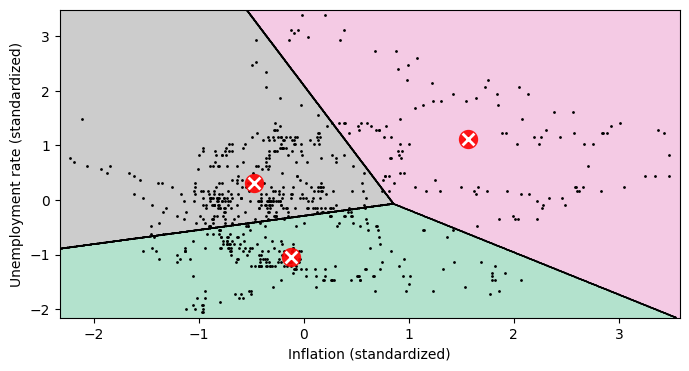

inertia = 567.7241247502058
Centriods:
[[-0.11729723 -1.04837757]
 [ 1.56062605  1.11791814]
 [-0.47137518  0.31764452]]
Probability transitions, training set:
[[0.94323144 0.00436681 0.05240175]
 [0.         0.97478992 0.02521008]
 [0.03571429 0.00595238 0.95833333]]
Probability transitions, training set:
[[0.94845361 0.01030928 0.04123711]
 [0.         0.33333333 0.66666667]
 [0.05172414 0.00862069 0.93965517]]


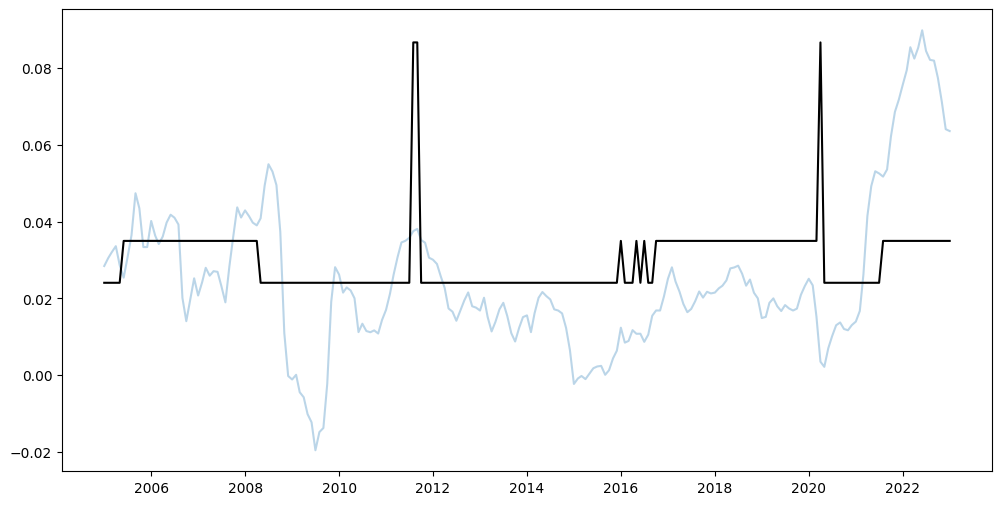

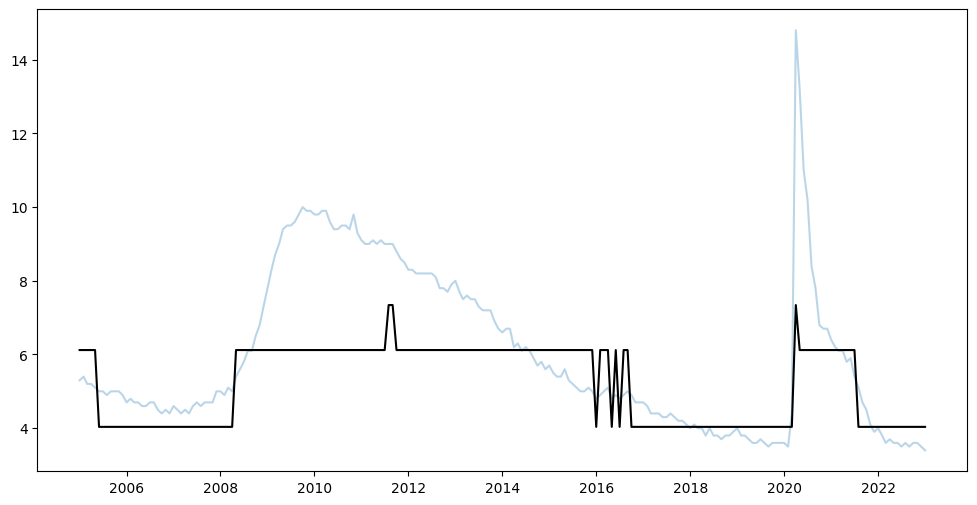

In [60]:
def question_4_output(k):
    print("k = ", k)
    plot_kmc(X,k,42)
    best_model = kM_models[k-2]
    clusters = best_model.cluster_centers_
    print("Centriods:")
    print(clusters)
    clusters = scaler.inverse_transform(clusters) # Centriod on original scale
    
    data_test_scaled = scaler.transform(data_test.values)
    best_mod_pred = best_model.predict(data_test_scaled)

    regimes_train = pd.DataFrame(data_test.iloc[:,0]).assign(
        regime = clusters[best_mod_pred][:,0].flatten()
    )

    plt.figure(figsize=(12,6))
    plt.plot(regimes_train["CPIAUCSL"], label="vol", alpha=.3)
    plt.plot(regimes_train["regime"], '-k', label="regime")

    regimes_train = pd.DataFrame(data_test.iloc[:,1]).assign(
        regime = clusters[best_mod_pred][:,1].flatten()
    )

    plt.figure(figsize=(12,6))
    plt.plot(regimes_train["UNRATE"], label="vol", alpha=.3)
    plt.plot(regimes_train["regime"], '-k', label="regime")

    P_train = transition_prob(best_model,X)
    print("Probability transitions, training set:")
    print(P_train)

    P_test = transition_prob(best_model,X_test)
    print("Probability transitions, training set:")
    print(P_test)


question_4_output(3)


Using $k=4$:

k =  4


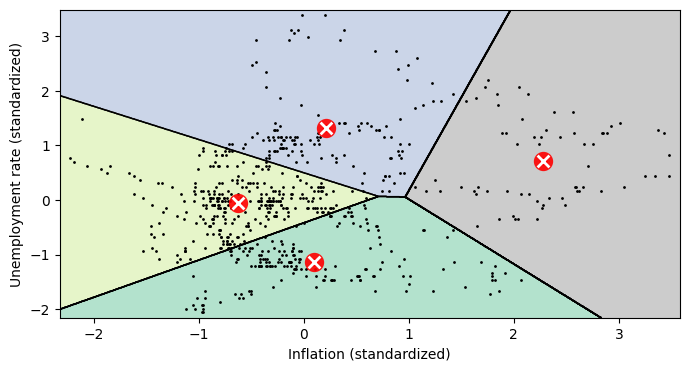

inertia = 415.3306453906314
Centriods:
[[ 0.10316173 -1.13003131]
 [ 0.2109552   1.31273999]
 [-0.62505584 -0.06167518]
 [ 2.28133316  0.70638224]]
Probability transitions, training set:
[[0.94350282 0.00564972 0.04519774 0.00564972]
 [0.         0.95454545 0.03787879 0.00757576]
 [0.02903226 0.00967742 0.96129032 0.        ]
 [0.         0.03076923 0.         0.96923077]]
Probability transitions, training set:
[[0.89189189 0.         0.10810811 0.        ]
 [0.         0.95384615 0.04615385 0.        ]
 [0.11688312 0.03896104 0.84415584 0.        ]
 [       nan        nan        nan        nan]]


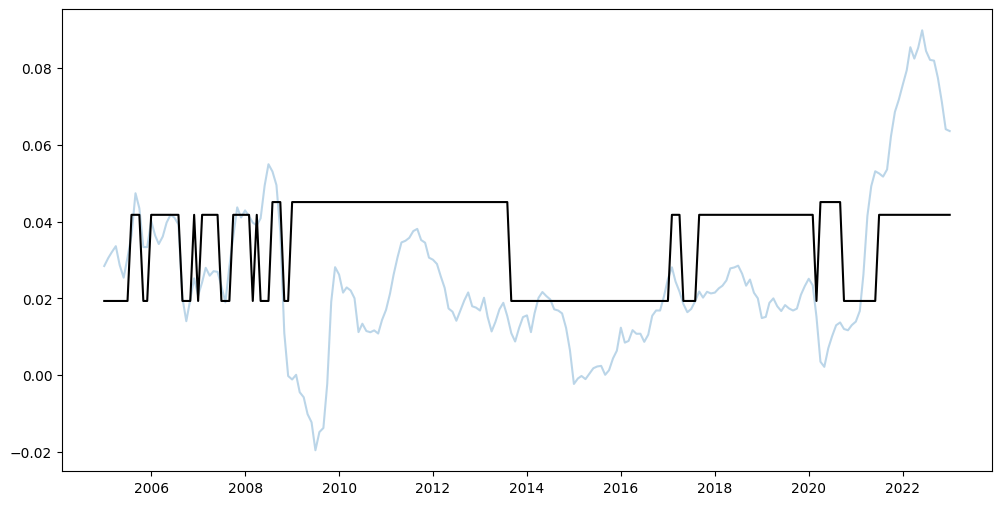

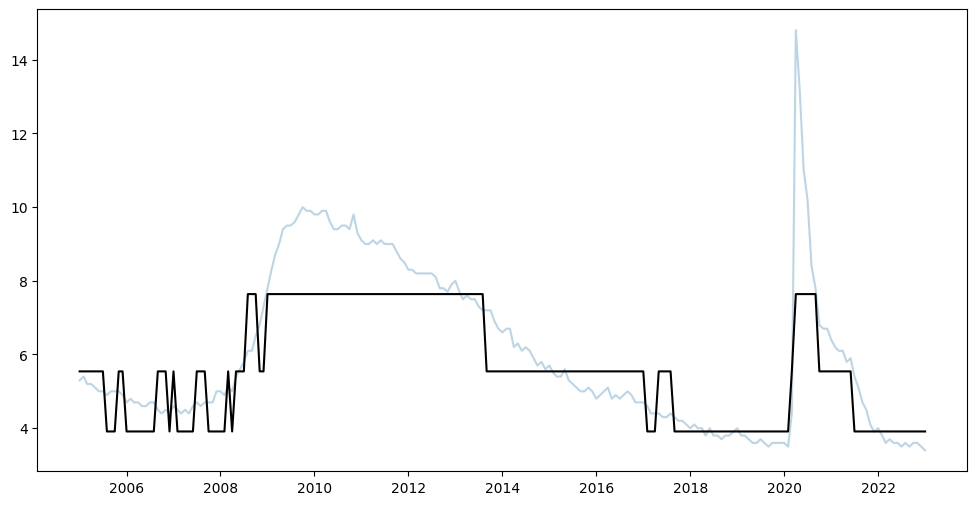

In [61]:
question_4_output(4)

Using $k=5$:

k =  5


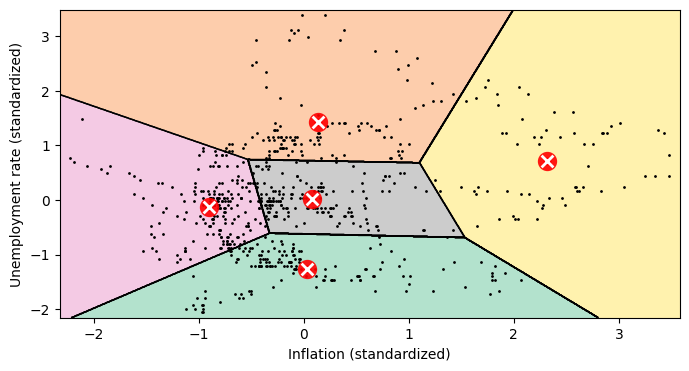

inertia = 351.27463630084304
Centriods:
[[ 0.02752498 -1.26114879]
 [ 0.13328681  1.41961006]
 [-0.89773283 -0.13362252]
 [ 2.31845046  0.72226864]
 [ 0.08215066  0.0169139 ]]
Probability transitions, training set:
[[0.9602649  0.         0.01986755 0.         0.01986755]
 [0.         0.93277311 0.02521008 0.         0.04201681]
 [0.0201005  0.00502513 0.93467337 0.         0.04020101]
 [0.         0.03174603 0.         0.96825397 0.        ]
 [0.00657895 0.03289474 0.04605263 0.01315789 0.90131579]]
Probability transitions, training set:
[[0.91071429 0.         0.07142857 0.         0.01785714]
 [0.         0.96825397 0.03174603 0.         0.        ]
 [0.06666667 0.03333333 0.85       0.         0.05      ]
 [       nan        nan        nan        nan        nan]
 [0.05405405 0.         0.08108108 0.         0.86486486]]


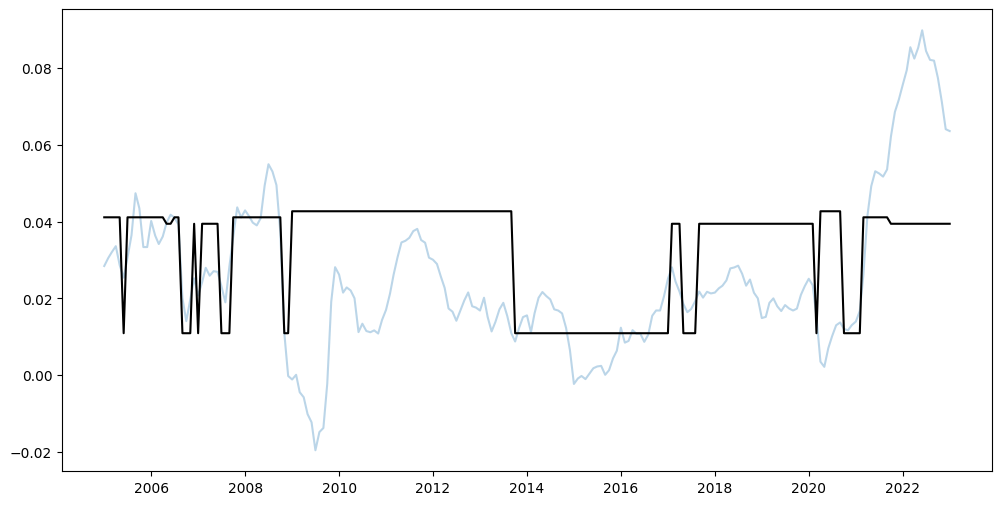

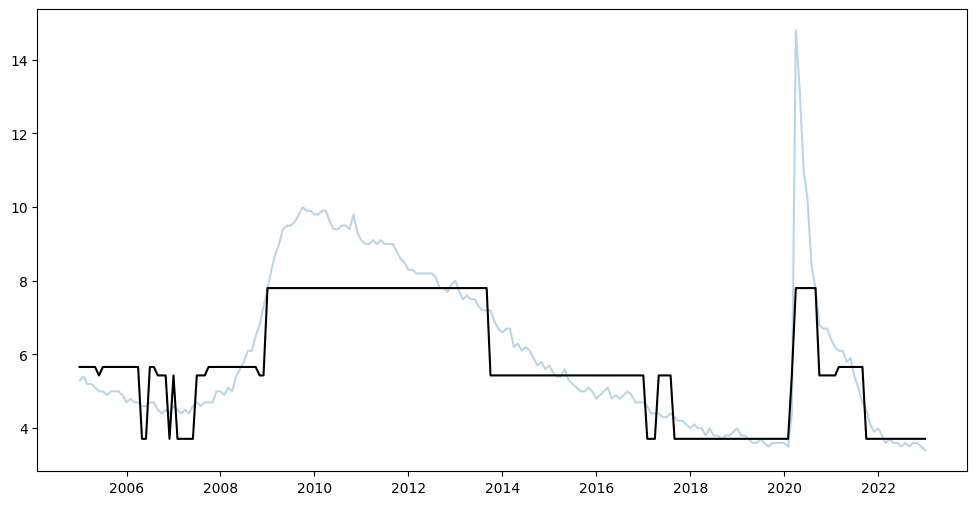

In [62]:
question_4_output(5)

# 5. Optional exercise: Neural Networks

There is nothing to submit for this exercise. However, it is strongly recommended that you spend time going through this exercise.

Visit the TensorFlow Playground at [https://playground.tensorflow.org/](https://playground.tensorflow.org/)

## (a)
**Layers and patterns:** Try training the default neural network by clicking the run button (top left). Notice how it quickly finds a good solution for the classification task. Notice that the neurons in the first hidden layer have learned simple patterns, while the neurons in the second hidden layer have learned to combine the simple patterns of the first hidden layer into more complex patterns. In general, the more layers, the more complex the patterns can be.

## (b)
**Activation function:** Try replacing the Tanh activation function with the ReLU activation function, and train the network again. Notice that it finds a solution even faster, but this time the boundaries are linear. This is due to the shape of the ReLU function.

Try, also, the sigmoid (i.e. the logistic) activation function. Note that it will take significantly more time for the ANN to properly classify the dataset (you should wait until around 900 epochs).

## (c)

**Local minima:** Modify the network architecture to have just one hidden layer with three neurons and the ReLU activation function. Train it multiple times. Between each training, press the reset button next to the play button on the top left. Notice that the training time and the shape of the decision borders varies a lot. If you are patient enough, you will notice that sometimes the network gets stuck in a local minimum which does not properly separate the classes (this happens at random).

## (d)

**Not enough neurons:** Next, remove one neuron so that you have only one hidden layer with 2 neurons. Notice that the neural network is now incapable of finding a good solution, even if you try multiple times. The model has too few parameters and it systematically underfits the training set.

## (e)
**Enough neurons:** Next, set the number of neurons to 8 and train the network several times. Notice that it is now consistently fast and never gets stuck. This highlights an important finding in neural network theory: large neural networks almost never get stuck at local optima, and even when they do these local optima are almost as good as the global optimum. However, they can still get stuck on long plateaus for a long time.

## (f)

**DNNs and vanishing gradients:** Now change the dataset to be the spiral (bottom right dataset under “DATA”). Change the network architecture to have 4 hidden layers with 8 neurons each. Notice that training takes much longer, and often gets stuck on plateaus for long periods of time. Also notice that the neurons in the highest layers (i.e. on the right) tend to evolve faster than the neurons in the lowest layers (i.e. on the left). This problem, called the “vanishing gradients” problem, can be alleviated using better weight initialization and other techniques, better optimizers (such as AdaGrad or Adam), or using Batch Normalization.